In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import re

## Analyze sales data to identify opportunities for growth and optimization. 

In [22]:
path='./data/prueba3.csv'

In [23]:
dtype_spec = {
    19: 'str',   
    20: 'str',   
    21: 'str',   
    22: 'str'
}

In [24]:
resta_df_original = pd.read_csv(path,on_bad_lines='skip', sep=',', dtype=dtype_spec, low_memory=False)

In [25]:
#Make a copy from the original dataset
resta_df = resta_df_original.copy()

## Exploratory Data Analysis

In [26]:
resta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505575 entries, 0 to 505574
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_pedido             505575 non-null  int64  
 1   fecha_sistema         505575 non-null  object 
 2   hora                  505575 non-null  object 
 3   clasificador_grupo    505575 non-null  object 
 4   clasificacion         474780 non-null  object 
 5   producto              505575 non-null  object 
 6   state                 505575 non-null  object 
 7   precio                505575 non-null  float64
 8   cantidad              505575 non-null  int64  
 9   a_pagar_xprod         505575 non-null  float64
 10  pago_pedido_tot       505575 non-null  float64
 11  product_observations  103879 non-null  object 
 12  tipo_forma_pago       505575 non-null  object 
 13  monto                 505575 non-null  float64
 14  observaciones_pedido  0 non-null       float64
 15  

In [27]:
resta_df.shape

(505575, 27)

In [28]:
resta_df.size

13650525

In [29]:
resta_df.head()

,id_pedido,fecha_sistema,hora,clasificador_grupo,clasificacion,producto,state,precio,cantidad,a_pagar_xprod,...,ubicacion,numero_pedido,fecha_modificacion,motivo_modificacion,es_anulado,es_cortesia,estado,saldo_inicial,saldo_final,stateprod
0,3208,2016-07-05,21:46:33.0000000,MENU,Sandwiches,Niki's club,ACTIVO,18.0,1,18.0,...,0 - Para llevar,2,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
1,3209,2016-07-05,22:00:30.0000000,MENU,Sandwiches,Sand de Pollo BBQ,ACTIVO,20.0,1,20.0,...,1 - Mesa 1,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
2,3210,2016-07-05,23:04:04.0000000,MENU,Fingers,Fingers miel,ACTIVO,22.0,1,22.0,...,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
3,3210,2016-07-05,23:04:04.0000000,BEBIDAS,jugos - aguas,Aquarius 500,ACTIVO,8.0,1,8.0,...,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
4,3211,2016-07-07,23:03:19.0000000,MENU,Alitas 8 UNIDADES,Alitas Barbacoa,ACTIVO,27.0,1,27.0,...,20 - Mesa 20,1,NaN,NaN,NaN,NaN,CERRADO,500.0,0.0,ACTIVO


In [30]:
resta_df.columns

Index(['id_pedido', 'fecha_sistema', 'hora', 'clasificador_grupo',
       'clasificacion', 'producto', 'state', 'precio', 'cantidad',
       'a_pagar_xprod', 'pago_pedido_tot', 'product_observations',
       'tipo_forma_pago', 'monto', 'observaciones_pedido', 'pagado_cliente',
       'cambio', 'ubicacion', 'numero_pedido', 'fecha_modificacion',
       'motivo_modificacion', 'es_anulado', 'es_cortesia', 'estado',
       'saldo_inicial', 'saldo_final', 'stateprod'],
      dtype='object')

In [31]:
#Change column names
resta_df.columns=['order_id', 'system_date', 'time', 'group_classifier',
        'classification', 'product', 'prod_state', 'price', 'quantity',
        'to_pay_xprod', 'tot_order_payment', 'product_observations',
        'type_payment_form', 'amount', 'order_observations', 'customer_pay',
        'change', 'location', 'order_number', 'modification_date',
        'modification_reason', 'is_cancelled', 'is_courtesy', 'status',
        'start_balance', 'end_balance', 'stateprod']

### Reviewing data types

In [32]:
resta_df.dtypes

order_id                  int64
system_date              object
time                     object
group_classifier         object
classification           object
product                  object
prod_state               object
price                   float64
quantity                  int64
to_pay_xprod            float64
tot_order_payment       float64
product_observations     object
type_payment_form        object
amount                  float64
order_observations      float64
customer_pay            float64
change                  float64
location                 object
order_number              int64
modification_date        object
modification_reason      object
is_cancelled             object
is_courtesy              object
status                   object
start_balance           float64
end_balance             float64
stateprod                object
dtype: object

In [33]:
# Convert data type to date time
resta_df['system_date'] = pd.to_datetime(resta_df['system_date'], format='%Y-%m-%d')

In [34]:
resta_df['time'] = pd.to_datetime(resta_df['time'], format='%H:%M:%S.%f')

#### Converto strings to lower case

In [35]:
# Place all string items in lower letters 

cols_to_lower=['classification', 'product', 'group_classifier','product_observations','location','prod_state','status','stateprod']

for col in cols_to_lower:
    if col in resta_df.columns:
        resta_df[col] = resta_df[col].str.lower()

In [36]:
#Delete any space before or after any value in the dataset
resta_df = resta_df.applymap(lambda x:x.strip() if isinstance(x,str) else x)

### Understanding columns type

In [37]:
# categorical columns 
categoric_col = [col for col in resta_df.columns if resta_df[col].dtype == 'object']
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [38]:
# numeric columns
numeric_col =[col for col in resta_df.columns if resta_df[col].dtype !='object']
print(f'Numeric columns are: {numeric_col}')

Numeric columns are: ['order_id', 'system_date', 'time', 'price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'order_observations', 'customer_pay', 'change', 'order_number', 'start_balance', 'end_balance']


In [39]:
# numerical but categorical variables
num_but_categorical = [col for col in numeric_col if resta_df[col].nunique() <10]
print(f'Numeric but categorical columns are: {num_but_categorical}')

Numeric but categorical columns are: ['order_observations']


In [40]:
# Adding num_but_cat to cat_cols
categoric_col = num_but_categorical + categoric_col
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [41]:
numeric_datetime = ['system_date', 'time', 'modification_date']

numeric_col = [col for col in numeric_col if col not in numeric_datetime and col not in num_but_categorical]

# id_cols removing from num_cols
id_cols = ['order_id', 'order_payment_id', 'order_number']
numeric_col = [col for col in numeric_col if col not in id_cols]

print(f"Numerical Cols: {numeric_col} \nCategorical Cols: {categoric_col} \nNumerical but Categorical: {num_but_categorical}")

Numerical Cols: ['price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'customer_pay', 'change', 'start_balance', 'end_balance'] 
Categorical Cols: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod'] 
Numerical but Categorical: ['order_observations']


## EDA

### Missing values

In [42]:
#Determining how many values are null in percentage.
((resta_df.isna().sum()/resta_df.shape[0])*100).sort_values(ascending=False)

order_observations      100.000000
is_cancelled             99.990704
modification_reason      99.990704
modification_date        99.990704
product_observations     79.453296
classification            6.091084
is_courtesy               0.375019
end_balance               0.223903
order_id                  0.000000
customer_pay              0.000000
start_balance             0.000000
status                    0.000000
order_number              0.000000
location                  0.000000
change                    0.000000
amount                    0.000000
system_date               0.000000
type_payment_form         0.000000
tot_order_payment         0.000000
to_pay_xprod              0.000000
quantity                  0.000000
price                     0.000000
prod_state                0.000000
product                   0.000000
group_classifier          0.000000
time                      0.000000
stateprod                 0.000000
dtype: float64

Since 'order_observations' has 100% of NaN values, is better to erase the entire column.


In [43]:
resta_df.drop(columns='order_observations', axis=1, inplace=True)

In [44]:
categoric_col.remove('order_observations')
categoric_col

['group_classifier',
 'classification',
 'product',
 'prod_state',
 'product_observations',
 'type_payment_form',
 'location',
 'modification_date',
 'modification_reason',
 'is_cancelled',
 'is_courtesy',
 'status',
 'stateprod']

#### NULL VALUES IN 'is_canceled column' 
'is cancelled' is equivalent to say that an order has been annuled  

In [45]:
resta_df['is_cancelled'].value_counts()

is_cancelled
True    47
Name: count, dtype: int64

In [46]:
#Get how many values are NAN in is cancelled column
resta_df['is_cancelled'].isna().sum()

505528

In [47]:
#In which cases there was reported as 'cancelled'
resta_df.loc[resta_df['is_cancelled']=='True', ['product','classification']].sample(5)


,product,classification
88875,alitas barbacoa,alitas 8 unidades
95068,niki's club,sandwiches
94536,alitas miel mostaza,alitas 8 unidades
200893,alitas buff 4 unid,alitas 4 unidades 19 bs
86358,alitas miel mostaza,alitas 8 unidades


In [48]:
# If there was a customer who paid and there was a change given, so there has been a purchase completed. 
# Accordingly, couldn't be cancelled
resta_df.loc[(resta_df['is_cancelled']=='True'),['product','to_pay_xprod','tot_order_payment','customer_pay','change','is_cancelled']].sample(5)

,product,to_pay_xprod,tot_order_payment,customer_pay,change,is_cancelled
94536,alitas miel mostaza,27.0,59.0,59.0,0.0,True
14121,alitas picantes,27.0,54.0,54.0,0.0,True
123427,chili mexic,160.0,160.0,160.0,0.0,True
205849,nachos con queso,64.0,76.0,76.0,0.0,True
88875,alitas barbacoa,27.0,29.5,29.5,0.0,True


##### Eventhough products which have status in 'is_cancelled' in True, were charged anyway. Which seems as an interesting input to analyze the owner. 
Paid customer, change and is_cancelled are not columns which reflect any important insight, since those seem to be erroneus values placed.

##### Analyze missing assingments 
All products which haven't been cancelled should have 'is_cancelled' status to False, and just 4 of them have it. So next step is fixing this issue.  

In [49]:
#NaN values in is_cancelled should be placed in False, since those orders were not cancelled 
resta_df[['product','is_cancelled','tot_order_payment','customer_pay','change']][resta_df['is_cancelled'].isna()].sample(5)

,product,is_cancelled,tot_order_payment,customer_pay,change
246025,alitas picantes,NaN,28.0,28.0,0.0
135405,1 llitro frutal,NaN,37.0,50.0,13.0
281977,fingers barbacoa,NaN,106.0,106.0,0.0
209493,sandwich de lomito,NaN,73.0,73.0,0.0
57540,salchibeef,NaN,187.0,187.0,0.0


In [50]:
#To all NaN values in 'is_cancelled' place False.
resta_df.fillna({'is_cancelled':'False'}, inplace=True)

In [51]:
resta_df['is_cancelled'].isna().sum()

0

#### NaN values in 'classification' column

In [52]:
resta_df['classification'].isna().sum()

30795

In [53]:
resta_df[['classification','product']][resta_df['classification'].isna()].sample(5)

,classification,product
401417,NaN,salsa albahaca
479403,NaN,salsa picante
47222,NaN,papas adicionales
206247,NaN,salsa picante
270224,NaN,salsa albahaca


According to the data source whenever there are null values in parent_product, means that parent product value is equal to product. 

In [54]:
#Fill null values with values which are in column product 
#resta_df['classification'].fillna(resta_df['product'], inplace=True)

resta_df.fillna({'classification': 'product'}, inplace=True)

In [55]:
resta_df['classification'].isna().sum()

0

#### NaN values in modification_reason column.
modification_reason, modification_dates, modification_time are related to is_cancelled column, meaning that whenever there is a cancellation there will be data in these columns, otherwise only False in is_cancelled column. NaN values qdont require to be erased yet, but NAN values in 'modification_reason'  could be replaced by 'Ninguna'.

In [56]:
resta_df['modification_reason'].isna().sum()

505528

In [57]:
resta_df[['modification_date','modification_reason','is_cancelled']][resta_df['modification_date'].isna()].sample(5)

,modification_date,modification_reason,is_cancelled
416503,NaN,NaN,False
476161,NaN,NaN,False
280676,NaN,NaN,False
11472,NaN,NaN,False
501043,NaN,NaN,False


In [58]:
resta_df[~resta_df['modification_reason'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
212708,359968,2019-06-08,1900-01-01 13:33:36,menu,alitas 8 unidades,alitas picantes,activo,28.0,1,28.0,...,17 - mesa 17,25,2019-06-08 13:57:29.483000000,PSO DE TIEMPO,True,False,cerrado,0.0,0.0,activo
86359,151568,2018-02-21,1900-01-01 13:11:31,bebidas,1 lt,sprite 1lt,activo,12.0,1,12.0,...,5 - mesa 5,28,2018-02-21 13:18:47.863000000,NO HAY MESA,True,False,cerrado,0.0,0.0,activo
82779,140023,2018-02-02,1900-01-01 21:58:49,menu,alitas 8 unidades,alitas miel mostaza,activo,27.0,1,27.0,...,0 - para llevar,143,2018-02-02 21:59:22.433000000,que solo queria una sola alaita,True,False,cerrado,0.0,0.0,activo
205849,348514,2019-05-18,1900-01-01 15:45:39,menu,platos,nachos con queso,activo,32.0,2,64.0,...,1 - mesa 1,60,2019-05-18 15:48:24.257000000,NO HY,True,False,cerrado,0.0,0.0,activo
123427,219853,2018-07-26,1900-01-01 15:10:00,menu,platos,chili mexic,activo,20.0,8,160.0,...,0 - para llevar,50,2018-07-26 17:30:17.573000000,porq ue se canselo su reunion,True,False,cerrado,0.0,0.0,activo


In [59]:
resta_df.loc[resta_df['modification_reason'].isna(),'modification_reason']='Ninguna'

In [60]:
resta_df['modification_reason'].isna().sum()

0

#### NaN values in 'product_observation' column
Whenever there were sales done as completed that meant Lunch, so users have used this space to detail the kind of lunch for that sale. When there is NaN in this column is not objetable

In [61]:
resta_df['product_observations'].isna().sum()

401696

In [62]:
resta_df['product_observations'].unique()

array([nan, 'una sin tomate ni tocino', 'solo una salsa aparte', ...,
       'queso y ajo salsa parte', 'de  la sierra',
       '6 albaca el resto surtido'], dtype=object)

In [63]:
resta_df[~resta_df['product_observations'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
438068,550666,2022-02-24,1900-01-01 21:12:51,bebidas,personal,fanta personal,activo,2.5,1,2.5,...,. - sin mesa,65,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
140682,258125,2018-09-30,1900-01-01 19:36:05,menu,alitas 8 unidades,alitas queso 8 unid,activo,22.0,1,22.0,...,2 - mesa 2,51,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
134736,246183,2018-09-07,1900-01-01 21:45:00,menu,alitas 8 unidades,alitas albahaca y hierbas,activo,28.0,1,28.0,...,. - sin mesa,79,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
411311,535617,2021-11-06,1900-01-01 12:38:07,bebidas,jugos - aguas,fanta 500cc,activo,8.0,2,16.0,...,. - sin mesa,7,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
183420,322238,2019-03-01,1900-01-01 12:11:57,menu,alitas 8 unidades,alitas barbacoa,activo,28.0,1,28.0,...,0 - para llevar,2,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [64]:
#Fullfill 'product_observations' with 'Ninguna' whenever there are NaN values
resta_df.loc[resta_df['product_observations'].isna(), 'product_observations']='Ninguna'

In [65]:
resta_df['product_observations'].isna().sum()

0

### NaN values in is_courtesy column
Orders which have been labeled NaN in is_courtesy should be changed to False, since those havent been a courtesy.

In [66]:
resta_df['is_courtesy'].isna().sum()

1896

In [67]:
resta_df['is_courtesy'].unique()

array([nan, 'False', 'True'], dtype=object)

In [68]:
resta_df[resta_df['is_courtesy'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
1043,6710,2016-08-02,1900-01-01 20:15:48,menu,alitas 8 unidades,alitas barbacoa - miel,activo,27.0,1,27.0,...,. - sin mesa,31,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
238,5314,2016-07-22,1900-01-01 22:30:25,bebidas,personal,coca cola personal,activo,2.0,1,2.0,...,. - sin mesa,3,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
1091,6728,2016-08-02,1900-01-01 22:46:21,menu,alitas 8 unidades,alitas miel mostaza,activo,27.0,2,54.0,...,0 - para llevar,49,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
1177,6765,2016-08-03,1900-01-01 20:03:32,menu,alitas 8 unidades,alitas miel mostaza,activo,27.0,1,27.0,...,12 - mesa 12,22,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
830,6615,2016-08-01,1900-01-01 13:51:00,bebidas,popular,fanta popular,activo,6.0,1,6.0,...,. - sin mesa,5,NaN,Ninguna,False,NaN,cerrado,500.0,1150.0,activo


In [69]:
#Whenever 'is_courtesy' equals to NaN the corret value should be False
resta_df.loc[resta_df['is_courtesy'].isna(),'is_courtesy'] = False

In [70]:
resta_df['is_courtesy'].isna().sum()

0

#### NaN values in end_balance column

In [71]:
resta_df['end_balance'].isna().sum()

1132

In [72]:
resta_df[resta_df['end_balance'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
292636,461926,2020-03-21,1900-01-01 12:52:09,menu,fingers,fingers queso,activo,25.0,1,25.0,...,11 - mesa 11,15,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
54976,94020,2017-09-04,1900-01-01 18:54:14,bebidas,frutal valle,1 llitro frutal,activo,15.0,1,15.0,...,. - sin mesa,4,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
292614,461919,2020-03-21,1900-01-01 12:37:52,menu,alitas 12 unidades,alitas buff 12 unid,activo,43.0,1,43.0,...,0 - para llevar,8,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
292608,461916,2020-03-21,1900-01-01 12:27:28,menu,alitas 8 unidades,alitas barbacoa,activo,30.0,1,30.0,...,0 - para llevar,5,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
87336,156558,2018-02-25,1900-01-01 13:51:06,otros,product,salsa miel mostaza,activo,3.0,1,3.0,...,0 - para llevar,18,NaN,Ninguna,False,False,abierto,0.0,NaN,activo


In [73]:
#'end_balance' shpuld not be null,NaN values shopuld be replaced by 0
resta_df.loc[resta_df['end_balance'].isna(),'end_balance'] = 0

In [74]:
resta_df['end_balance'].isna().sum()

0

## Analyze Outliers

### Numerical variables

#### Analysis of 'price' column

In [75]:
resta_df['price'].describe()

count    505575.000000
mean         20.317964
std          13.313448
min           1.000000
25%          12.000000
50%          22.000000
75%          27.000000
max         130.000000
Name: price, dtype: float64

In [76]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['price'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['price'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

Lower limit is:  -10.0
Upper limit 50.0


In [77]:
#show all values greater than the max limit
resta_df['price'][resta_df['price'] > upper_limit].value_counts().sort_values(ascending=False)

price
55.0     5664
57.0     3645
88.0      820
65.0      689
110.0     550
75.0      254
78.0      155
96.0      138
85.0      112
80.0       97
122.0      77
70.0       45
86.0       35
99.0       18
63.0       17
123.0      10
69.0        7
59.0        5
130.0       3
120.0       2
72.0        1
87.0        1
Name: count, dtype: int64

In [78]:
#which products have 55 or more as a price
resta_df[resta_df['price'] > upper_limit].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
433940,548618,2022-02-08,1900-01-01 19:24:10,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,57.0,1,57.0,...,. - sin mesa,78,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
484157,574232,2022-09-06,1900-01-01 14:03:14,menu,fingers 12 unid,fingers 12 u miel de mostaza,activo,57.0,1,57.0,...,0 - para llevar,24,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
293829,462488,2020-05-17,1900-01-01 17:33:40,menu,alitas 16 unidades,alitas bbq 16 unid,activo,55.0,2,110.0,...,0 - para llevar,44,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
419016,540336,2021-12-06,1900-01-01 20:15:19,menu,alitas 16 unidades,alitas bbq 16 unid,activo,57.0,1,57.0,...,. - sin mesa,99,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
300977,465990,2020-07-04,1900-01-01 12:29:19,menu,alitas 16 unidades,alitas bbq 16 unid,activo,55.0,1,55.0,...,0 - para llevar,7,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
488753,576503,2022-09-27,1900-01-01 14:16:35,menu,alitas 32 unidades,alitas bbq 32 unid,activo,122.0,2,244.0,...,0 - para llevar,35,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
409357,534684,2021-10-30,1900-01-01 14:08:37,menu,fingers,finger 12 unidades,inactivo,55.0,1,55.0,...,. - sin mesa,39,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
492620,578485,2022-10-15,1900-01-01 14:37:04,menu,fingers 12 unid,fingers 12 u barbacoa,activo,57.0,1,57.0,...,0 - para llevar,41,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
273625,450131,2020-01-15,1900-01-01 19:54:39,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,1,55.0,...,0 - para llevar,44,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
316943,478080,2020-10-11,1900-01-01 14:49:01,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,2,110.0,...,0 - para llevar,50,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [79]:
resta_df[['classification','price']][resta_df['price'] > 88].value_counts()

classification      price
alitas 32 unidades  110.0    513
alitas 24 unidades  96.0     138
alitas 32 unidades  122.0     77
product             110.0     37
combos              99.0      18
sin uso             123.0     10
promocion           130.0      3
combos              120.0      2
Name: count, dtype: int64

In [80]:
resta_df[['classification','price']][resta_df['price'] ==resta_df['price'].min()].value_counts()

classification  price
delivery        1.0      16547
sin uso         1.0       2975
product         1.0        431
Name: count, dtype: int64

In [81]:
resta_df[['classification','price']][resta_df['price']==resta_df['price'].max()].value_counts()

classification  price
promocion       130.0    3
Name: count, dtype: int64

#### Analysis of 'quantity' column

In [82]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['quantity'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['quantity'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

Lower limit is:  1.0
Upper limit 1.0


In [83]:
resta_df['quantity'].value_counts().sort_values(ascending=False)

quantity
1      412687
2       59788
3        9685
4        4319
5        3063
        ...  
54          1
59          1
62          1
135         1
96          1
Name: count, Length: 79, dtype: int64

In [84]:
resta_df[resta_df['quantity'] > upper_limit].sort_values(by='quantity').sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
340870,492573,2021-01-16,1900-01-01 12:40:12,bebidas,personal,fanta personal,activo,2.5,3,7.5,...,11 - mesa 11,5,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
15020,26482,2016-12-06,1900-01-01 20:57:31,menu,alitas 8 unidades,alitas miel mostaza,activo,27.0,2,54.0,...,8 - mesa 8,35,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
238403,386312,2019-09-03,1900-01-01 12:46:23,menu,alitas 6 unidades 26 bs,alitas picante 6 unid,activo,22.0,2,44.0,...,4 - mesa 4,12,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
440178,551696,2022-03-06,1900-01-01 21:16:16,menu,delivery,pedidos ya,activo,1.0,9,9.0,...,0 - para llevar,114,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
191166,328202,2019-03-30,1900-01-01 16:01:20,menu,alitas 8 unidades,alitas barbacoa,activo,28.0,2,56.0,...,13 - mesa 13,49,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [85]:
resta_df[resta_df['quantity'] > 60].sort_values(by='quantity').sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
483158,573738,2022-09-01,1900-01-01 13:39:08,otros,product,aceite,activo,1.0,67,67.0,...,0 - para llevar,23,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
292058,461647,2020-03-17,1900-01-01 12:04:27,menu,alitas 4 unidades 19 bs,alitas miel 4 unid,activo,16.0,66,1056.0,...,0 - para llevar,2,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
456972,559899,2022-05-13,1900-01-01 16:04:12,otros,product,aceite,activo,1.0,67,67.0,...,0 - para llevar,59,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
480071,572197,2022-08-18,1900-01-01 11:57:42,otros,product,aceite,activo,1.0,65,65.0,...,0 - para llevar,1,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
498110,581254,2022-11-10,1900-01-01 12:20:47,otros,product,aceite,activo,1.0,100,100.0,...,0 - para llevar,5,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


### Categorical variables

#### Analysis of 'prod_state' column

In [86]:
resta_df[resta_df['price']==1].groupby(['classification','product','prod_state'])['to_pay_xprod'].count()

classification  product             prod_state
delivery        dinki               activo          435
                ego                 activo           53
                fast driver         activo           41
                link                activo          154
                mr. delivery        activo          784
                patio service       activo          253
                pedidos ya          activo        12819
                xpress              activo           78
                yaigo               activo         1930
product         aceite              activo           37
                envases             activo          375
                pollo a la canasta  activo           19
sin uso         finger              inactivo        164
                link                activo           50
                mr. delivery        activo          571
                patio service       activo          270
                pedidos ya          activo         1920
N

In [87]:
resta_df[resta_df['prod_state']=='inactivo'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
109602,195831,2018-06-01,1900-01-01 21:06:59,menu,alitas 8 unidades,sin salsa,inactivo,15.0,1,15.0,...,6 - mesa 6,143,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
39873,72580,2017-06-14,1900-01-01 13:28:37,menu,almuerzos,sopa,inactivo,7.0,1,7.0,...,6 - mesa 6,33,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
157596,286363,2018-11-30,1900-01-01 20:02:28,menu,alitas 8 unidades,alita 16 unidades,inactivo,50.0,2,100.0,...,0 - para llevar,16,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
124374,224092,2018-07-30,1900-01-01 17:30:30,menu,alitas 8 unidades,alita 16 unidades,inactivo,50.0,1,50.0,...,9 - mesa 9,44,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
411028,535482,2021-11-05,1900-01-01 13:39:49,menu,fingers,finger 8 unidades,inactivo,45.0,1,45.0,...,4 - mesa 4,34,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo


## Feature Engineering - Data preparation

### Checking for duplicates

In [88]:
resta_df.duplicated().sum()

0

### Structure modification

### Unnecessary columns.
--- drop type_payment_form since has a unique value 'EFE'.
--- determine whether to delete status 
--- determine whether to delete stateprod which seems to be equal to prod_state

--- determine whether to delete start_balance and end_balance 

In [89]:
#type_payment_form column analysis
resta_df['type_payment_form'].value_counts()

type_payment_form
EFE    505575
Name: count, dtype: int64

In [90]:
resta_df = resta_df.drop('type_payment_form', axis=1)

'status' column appears to not determine anything in specific, since cerrado has 503968 values and abierto 1132. These seems to be wrong load.

In [91]:
resta_df['status'].value_counts()

status
cerrado    504443
abierto      1132
Name: count, dtype: int64

In [92]:
resta_df = resta_df.drop('status', axis=1)

'prod_state','stateprod' have equal values so one of those will be deleted.

In [93]:
resta_df[['prod_state','stateprod']].sample(20)

,prod_state,stateprod
398300,activo,activo
502102,activo,activo
266590,activo,activo
35005,inactivo,inactivo
131924,activo,activo
210154,activo,activo
352259,activo,activo
344821,activo,activo
56112,activo,activo
166818,activo,activo


In [94]:
resta_df = resta_df.drop('stateprod', axis=1)

'start_balance','end_balance' there is no coherence on the first value refarding the other, when start balance has a value, in several cases end_balance has 0. These inconsistencies are not useful for the project.

In [95]:
resta_df[['start_balance','end_balance']].head(20)

,start_balance,end_balance
0,500.0,620.0
1,500.0,620.0
2,500.0,620.0
3,500.0,620.0
4,500.0,0.0
5,500.0,0.0
6,500.0,0.0
7,500.0,0.0
8,500.0,0.0
9,500.0,0.0


In [96]:
resta_df = resta_df.drop(columns=['start_balance','end_balance'], axis=1)

Correcting Categorical selected list, deleting dropped columns

In [97]:
dropped_cols = ['start_balance','end_balance','stateprod','status','type_payment_form']

In [98]:
categorical_selected = [col for col in categoric_col if col not in dropped_cols]
categorical_selected

['group_classifier',
 'classification',
 'product',
 'prod_state',
 'product_observations',
 'location',
 'modification_date',
 'modification_reason',
 'is_cancelled',
 'is_courtesy']

### Analysis and corrections in price column 
Orders with price equals to 1 seem to be related to deliveries, inventaryn products and others. These should be reviewed and cleaned to have consistency information regarding only sales.  

In [99]:
resta_df[resta_df['price']==1].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,product_observations,amount,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy
489020,576635,2022-09-28,1900-01-01 19:09:03,menu,delivery,pedidos ya,activo,1.0,6,6.0,...,Ninguna,24.0,24.0,0.0,0 - para llevar,31,NaN,Ninguna,False,False
496379,580422,2022-11-02,1900-01-01 13:34:05,menu,delivery,pedidos ya,activo,1.0,22,22.0,...,Ninguna,106.0,106.0,0.0,0 - para llevar,12,NaN,Ninguna,False,False
487826,576065,2022-09-22,1900-01-01 20:28:54,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,Ninguna,19.0,19.0,0.0,0 - para llevar,44,NaN,Ninguna,False,False
420462,541031,2021-12-12,1900-01-01 12:08:55,menu,delivery,pedidos ya,activo,1.0,21,21.0,...,Ninguna,105.0,105.0,0.0,0 - para llevar,5,NaN,Ninguna,False,False
373664,511554,2021-06-06,1900-01-01 16:27:09,menu,delivery,pedidos ya,activo,1.0,5,5.0,...,Ninguna,28.0,28.0,0.0,0 - para llevar,54,NaN,Ninguna,False,False
299636,465328,2020-06-24,1900-01-01 19:52:35,menu,sin uso,pedidos ya,activo,1.0,4,4.0,...,Ninguna,20.0,20.0,0.0,0 - para llevar,67,NaN,Ninguna,False,False
434242,548767,2022-02-09,1900-01-01 20:09:13,menu,delivery,pedidos ya,activo,1.0,14,14.0,...,Ninguna,66.0,66.0,0.0,0 - para llevar,104,NaN,Ninguna,False,False
301709,466344,2020-07-09,1900-01-01 11:59:27,menu,sin uso,pedidos ya,activo,1.0,9,9.0,...,Ninguna,52.0,52.0,0.0,0 - para llevar,6,NaN,Ninguna,False,False
455561,559204,2022-05-08,1900-01-01 12:16:11,menu,delivery,pedidos ya,activo,1.0,5,5.0,...,Ninguna,28.0,28.0,0.0,0 - para llevar,3,NaN,Ninguna,False,False
402748,531520,2021-10-03,1900-01-01 20:21:58,menu,delivery,dinki,activo,1.0,11,11.0,...,Ninguna,131.0,131.0,0.0,0 - para llevar,95,NaN,Ninguna,False,False


#### Transforming - DELIVERY column

column 'product', within product there have been identified these as deliveries: dinki,ego,fast driver,mr. delivery,patio service,pedidos ya,link.

In [100]:
#Creating a new column called 'delivery_name' to determine which delivery enterprise corresponds to.
resta_df['delivery_name'] = pd.Series()

In [101]:
deliveries = ['dinki','ego','fast driver','mr. delivery','patio service','pedidos ya','link', 'yaigo', 'xpress']

### Analysis of location column
location column was analyzed and filtered in order_type, to have these categories: para llevar, en sala-sin mesa, en sala-con mesa.

In [102]:
#To determine whether an order will be in situ or to take away, another column is created.
resta_df['order_type'] = pd.Series()

In [103]:
resta_df['location'].value_counts()

location
0 - para llevar    198901
. - sin mesa       143684
5 - mesa 5          26782
1 - mesa 1          16626
7 - mesa 7          16144
4 - mesa 4          13230
2 - mesa 2          12393
6 - mesa 6          10841
3 - mesa 3          10117
8 - mesa 8           9240
11 - mesa 11         8040
13 - mesa 13         6115
12 - mesa 12         6005
9 - mesa 9           5718
14 - mesa 14         4889
17 - mesa 17         4756
10 - mesa 10         3145
15 - mesa 15         2849
20 - mesa 20         2411
16 - mesa 16         2156
18 - mesa 18          916
19 - mesa 19          617
Name: count, dtype: int64

In [104]:
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type'].sample(5)

306124    NaN
401961    NaN
241425    NaN
68329     NaN
505458    NaN
Name: order_type, dtype: object

In [105]:
#to take away filters
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type'] = 'para llevar'

In [106]:
#'sin mesa' values 
resta_df.loc[(resta_df['location'].str.contains('sin mesa')) & (resta_df['classification']!='delivery'), 'order_type'] = 'en sala-sin mesa'

In [107]:
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['location'].str.contains('- mesa')) & (resta_df['classification']!='delivery'), 'order_type'] = 'en sala-con mesa'

In [108]:
resta_df['order_type'].unique()

array(['para llevar', 'en sala-con mesa', 'en sala-sin mesa', nan],
      dtype=object)

#### Analysis by 'classification'
Within classification column there is a 'delivery' option. Accordingly that order was a delivery.

In [109]:
resta_df['classification'].value_counts()

classification
alitas 8 unidades            102397
alitas 6 unidades  26 bs      59719
fingers                       44933
personal                      39167
product                       30795
alitas 4 unidades   19 bs     29276
burguers                      26579
salchis                       24636
popular                       23895
delivery                      16547
alitas 12 unidades            16310
sandwiches                    12925
1 lt                          12617
alitas 16 unidades            11683
jugos - aguas                 11645
platos                        10161
frutal valle                   8285
2 lt                           7934
sin uso                        3754
combos                         2484
jarras                         2230
almuerzos                      1814
fingers 6 unid                 1649
alitas 24 unidades              919
gusto                           780
fingers 12 unid                 649
alitas 32 unidades              590
fingers 8 uni

In [110]:
resta_df[['classification','product','location']][resta_df['classification'].str.contains('deliver')].head()

,classification,product,location
280762,delivery,mr. delivery,0 - para llevar
280780,delivery,mr. delivery,0 - para llevar
280793,delivery,mr. delivery,0 - para llevar
280866,delivery,mr. delivery,0 - para llevar
281579,delivery,mr. delivery,0 - para llevar


In [111]:
# identify deliveries by classification column
resta_df.loc[resta_df['classification']=='delivery', 'order_type'] = 'delivery'

In [112]:
#There are orders that were a delivery but werent classified as that. 
resta_df[resta_df['classification']=='delivery'].groupby(['order_type','product'])['product'].count()

order_type  product      
delivery    dinki              435
            ego                 53
            fast driver         41
            link               154
            mr. delivery       784
            patio service      253
            pedidos ya       12819
            xpress              78
            yaigo             1930
Name: product, dtype: int64

Text(0, 0.5, '# orders')

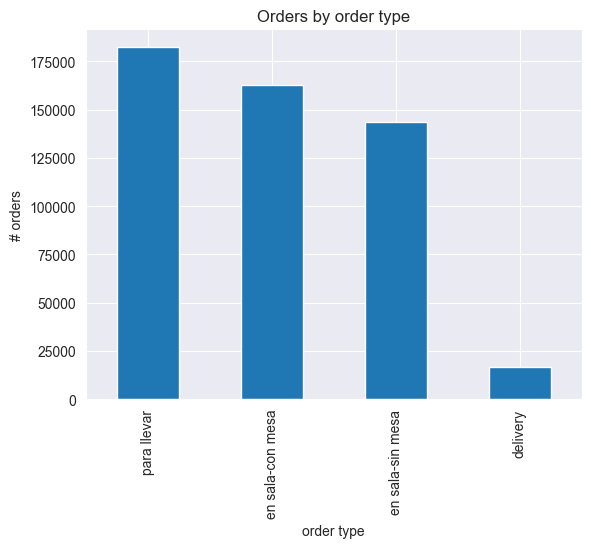

In [113]:
resta_df['order_type'].value_counts().plot(kind='bar')
plt.title('Orders by order type')
plt.xlabel('order type')
plt.ylabel('# orders')

#### Fill delivery_name column 

In [114]:
resta_df[['classification','product','location']][resta_df['order_type']=='delivery'].sample(10)

,classification,product,location
504004,delivery,pedidos ya,0 - para llevar
360917,delivery,link,0 - para llevar
315227,delivery,pedidos ya,0 - para llevar
295329,delivery,pedidos ya,0 - para llevar
360359,delivery,pedidos ya,0 - para llevar
383547,delivery,mr. delivery,0 - para llevar
318440,delivery,pedidos ya,0 - para llevar
427222,delivery,pedidos ya,0 - para llevar
427895,delivery,pedidos ya,0 - para llevar
398921,delivery,pedidos ya,0 - para llevar


In [115]:
#Mask
mask = resta_df.loc[resta_df['order_type']=='delivery', 'product']

In [116]:
#Appling a filter 
filtered_products = [prod for prod in mask if prod in deliveries]

In [117]:
#**********
resta_df['delivery_name'] = resta_df['product'].apply(lambda x:x if x in filtered_products else None)

In [118]:
resta_df['delivery_name'].unique()

array([None, 'mr. delivery', 'pedidos ya', 'patio service', 'link',
       'fast driver', 'yaigo', 'dinki', 'ego', 'xpress'], dtype=object)

In [119]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False)

delivery_name
pedidos ya       945181.0
yaigo            133747.0
mr. delivery     121533.0
patio service     35653.0
dinki             29233.0
link              13154.0
xpress             3704.0
fast driver        3556.0
ego                2828.0
Name: tot_order_payment, dtype: float64

Text(0, 0.5, '$ Order payment')

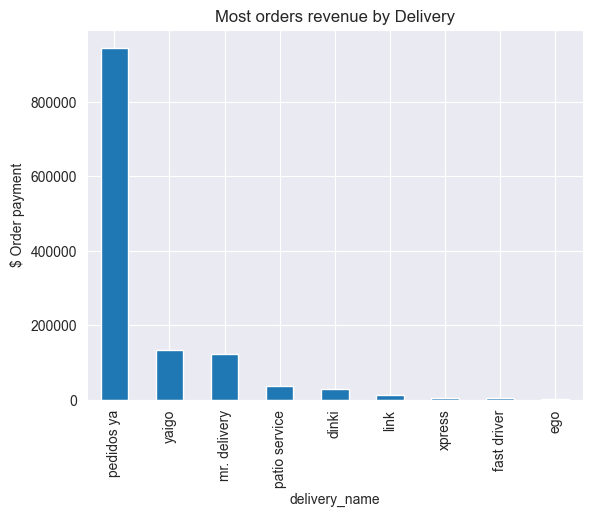

In [120]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Most orders revenue by Delivery')
plt.ylabel('$ Order payment')

#### Analyzing SIN USO value in classification column

'SIN USO' has orders that were delivered and in some cases it refers to a delivery, in others to products which are not longer in use. However for the purpose of this job it is important to account those values.
1. Understand which rows have SIN USO 
2. check the context 
3. sin uso has products: deliveries, others.
3.1. treat deliveries x
3.2. treat other products  PENDING

says SIN USO but in product state is ACTIVE so there seems to be mistaken fullfilment. 


##### Deliveries

In [121]:
resta_df[resta_df['classification'].str.contains('sin')].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
285097,456423,2020-02-21,1900-01-01 20:31:58,menu,sin uso,mr. delivery,activo,1.0,9,9.0,...,62.0,0.0,0 - para llevar,64,NaN,Ninguna,False,False,mr. delivery,para llevar
298405,464756,2020-06-17,1900-01-01 12:38:30,menu,sin uso,pedidos ya,activo,1.0,18,18.0,...,44.0,0.0,0 - para llevar,10,NaN,Ninguna,False,False,pedidos ya,para llevar
304612,468807,2020-07-28,1900-01-01 17:17:45,menu,sin uso,pedidos ya,activo,1.0,8,8.0,...,40.0,0.0,0 - para llevar,32,NaN,Ninguna,False,False,pedidos ya,para llevar
301154,466067,2020-07-05,1900-01-01 12:14:41,menu,sin uso,pedidos ya,activo,1.0,14,14.0,...,84.0,0.0,0 - para llevar,12,NaN,Ninguna,False,False,pedidos ya,para llevar
259927,423622,2019-11-25,1900-01-01 21:43:49,menu,sin uso,mr. delivery,activo,24.0,1,24.0,...,27.0,0.0,0 - para llevar,95,NaN,Ninguna,False,False,mr. delivery,para llevar
261275,428426,2019-12-01,1900-01-01 18:24:05,menu,sin uso,mr. delivery,activo,22.0,1,22.0,...,22.0,0.0,. - sin mesa,66,NaN,Ninguna,False,False,mr. delivery,en sala-sin mesa
298875,464986,2020-06-19,1900-01-01 18:54:40,menu,sin uso,pedidos ya,activo,1.0,23,23.0,...,78.0,0.0,0 - para llevar,68,NaN,Ninguna,False,False,pedidos ya,para llevar
259473,422420,2019-11-21,1900-01-01 20:07:45,menu,sin uso,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,. - sin mesa,21,NaN,Ninguna,False,False,mr. delivery,en sala-sin mesa
306993,470936,2020-08-14,1900-01-01 20:01:50,menu,sin uso,pollo a la canasta,inactivo,26.0,6,156.0,...,212.0,0.0,0 - para llevar,72,NaN,Ninguna,False,False,None,para llevar
308453,471661,2020-08-23,1900-01-01 13:18:19,menu,sin uso,patio service,activo,1.0,4,4.0,...,48.0,0.0,0 - para llevar,30,NaN,Ninguna,False,False,patio service,para llevar


In [122]:
resta_df['product'][resta_df['classification'].str.contains('sin')].unique()

array(['finger', 'h4mburgu cl4sic', 'reto wings', 'promo trio 21 sep',
       'mr. delivery', 'pedidos ya', 'patio service', 'link',
       'combo paceñisimo', 'combo patriota', 'pollo a la canasta',
       'combo papa'], dtype=object)

In [123]:
#if some orders were delivery that has to be reflected in order_type section
resta_df[['product','price','quantity','location','delivery_name','order_type']][(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries))].sample(20)

,product,price,quantity,location,delivery_name,order_type
306315,pedidos ya,1.0,9,0 - para llevar,pedidos ya,para llevar
297242,pedidos ya,1.0,15,0 - para llevar,pedidos ya,para llevar
305607,pedidos ya,1.0,5,0 - para llevar,pedidos ya,para llevar
304344,patio service,1.0,4,0 - para llevar,patio service,para llevar
261305,mr. delivery,22.0,1,5 - mesa 5,mr. delivery,en sala-con mesa
304147,pedidos ya,1.0,10,0 - para llevar,pedidos ya,para llevar
303961,mr. delivery,1.0,6,0 - para llevar,mr. delivery,para llevar
305610,pedidos ya,1.0,10,0 - para llevar,pedidos ya,para llevar
296826,mr. delivery,1.0,6,0 - para llevar,mr. delivery,para llevar
299985,pedidos ya,1.0,8,0 - para llevar,pedidos ya,para llevar


##### correct order_type to delivery

sin uso, has as products deliveries which are active, that could be seen in prod_state. So these should be changed to classification=delivery.

In [124]:
#correct order_type to delivery
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries)),'order_type'] = 'delivery'

In [125]:
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']=='delivery'), 'classification'] = 'delivery'

##### Deliveries vs para llevar, separation

In [126]:
resta_df[['order_id','location','product','order_type','delivery_name','price','quantity','to_pay_xprod','tot_order_payment','customer_pay']][resta_df['order_id']==529814]

,order_id,location,product,order_type,delivery_name,price,quantity,to_pay_xprod,tot_order_payment,customer_pay
401245,529814,0 - para llevar,chicken bites,para llevar,None,17.0,1,17.0,106.0,106.0
401246,529814,0 - para llevar,alitas albahaca 6unid,para llevar,None,24.0,1,24.0,106.0,106.0
401247,529814,0 - para llevar,alitas picante 6 unid,para llevar,None,24.0,1,24.0,106.0,106.0
401248,529814,0 - para llevar,alitas barbacoa 6 unid,para llevar,None,24.0,1,24.0,106.0,106.0
401249,529814,0 - para llevar,pedidos ya,delivery,pedidos ya,1.0,17,17.0,106.0,106.0


There are orders which dont have any other products associatied to it, and its elements are not coherent with a real sale. This should be deleted.

In [127]:
#only deliveries with price 1

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1),'to_pay_xprod'].describe()


count    19358.000000
mean        10.689482
std          6.810646
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        106.000000
Name: to_pay_xprod, dtype: float64

In [128]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1),:].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
287435,458490,2020-03-02,1900-01-01 19:36:59,menu,delivery,mr. delivery,activo,1.0,1,1.0,...,38.0,0.0,. - sin mesa,40,NaN,Ninguna,False,False,mr. delivery,delivery
296622,463894,2020-06-07,1900-01-01 14:04:35,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,69.0,0.0,0 - para llevar,42,NaN,Ninguna,False,False,pedidos ya,delivery
297051,464129,2020-06-09,1900-01-01 19:42:22,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,1.0,0.0,0 - para llevar,107,NaN,Ninguna,False,False,pedidos ya,delivery
299754,465385,2020-06-25,1900-01-01 16:48:10,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,81.0,0.0,0 - para llevar,45,NaN,Ninguna,False,False,pedidos ya,delivery
323009,481033,2020-11-07,1900-01-01 13:17:11,menu,delivery,patio service,activo,1.0,1,1.0,...,17.0,0.0,0 - para llevar,26,NaN,Ninguna,False,False,patio service,delivery
350947,498345,2021-03-02,1900-01-01 12:32:25,menu,delivery,dinki,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,11,NaN,Ninguna,False,False,dinki,delivery
350954,498349,2021-03-02,1900-01-01 12:40:37,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,89.0,0.0,0 - para llevar,15,NaN,Ninguna,False,False,pedidos ya,delivery
364560,506003,2021-04-30,1900-01-01 13:40:44,menu,delivery,dinki,activo,1.0,1,1.0,...,70.0,0.0,0 - para llevar,25,NaN,Ninguna,False,False,dinki,delivery
367565,508511,2021-05-12,1900-01-01 18:45:34,menu,delivery,link,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,78,NaN,Ninguna,False,False,link,delivery
375698,512544,2021-06-15,1900-01-01 12:52:14,menu,delivery,dinki,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,13,NaN,Ninguna,False,False,dinki,delivery


In [129]:
mistakenonly_1s = resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1)&(resta_df['tot_order_payment']==1),:].index
mistakenonly_1s

Index([297051], dtype='int64')

In [130]:
#Deleting wrong value
resta_df=resta_df.drop(mistakenonly_1s, axis=0).reset_index(drop=True)

##### Identity False deliveries

When price is different than 1 and quantity too, then that cant be considered a delivery, probably thoe are products that were mistankenly loaded. There were 143 possible values registered as delivery which were products.

--- classification will be modified --- product will be changed
--- order type could be used location to determine this. --- delivery modified

In [131]:
resta_df[(resta_df['order_type']=='delivery') & (resta_df['price']!=1) &(resta_df['quantity']!=1)].head(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
259403,421562,2019-11-21,1900-01-01 15:00:23,menu,delivery,mr. delivery,activo,20.0,4,80.0,...,96.0,0.0,4 - mesa 4,38,NaN,Ninguna,False,False,mr. delivery,delivery
259405,421563,2019-11-21,1900-01-01 15:03:13,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,4 - mesa 4,39,NaN,Ninguna,False,False,mr. delivery,delivery
259406,421564,2019-11-21,1900-01-01 15:11:33,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,76.0,0.0,2 - mesa 2,40,NaN,Ninguna,False,False,mr. delivery,delivery
259408,421565,2019-11-21,1900-01-01 15:36:39,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,0 - para llevar,41,NaN,Ninguna,False,False,mr. delivery,delivery
259410,421567,2019-11-21,1900-01-01 16:31:46,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,43.0,0.0,. - sin mesa,43,NaN,Ninguna,False,False,mr. delivery,delivery
259413,421569,2019-11-21,1900-01-01 16:41:25,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,66.0,0.0,4 - mesa 4,45,NaN,Ninguna,False,False,mr. delivery,delivery
259415,421570,2019-11-21,1900-01-01 16:49:12,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,12 - mesa 12,46,NaN,Ninguna,False,False,mr. delivery,delivery
259425,421578,2019-11-21,1900-01-01 17:24:13,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,60.0,0.0,2 - mesa 2,54,NaN,Ninguna,False,False,mr. delivery,delivery
259433,421584,2019-11-21,1900-01-01 18:01:06,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,11 - mesa 11,60,NaN,Ninguna,False,False,mr. delivery,delivery
259434,421585,2019-11-21,1900-01-01 18:03:02,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,46.0,0.0,. - sin mesa,61,NaN,Ninguna,False,False,mr. delivery,delivery


Modification of 'classification' and 'product' column values.

There are products which seems to have been mistakenly classified as delivery placing a value in price and a value greater than one in quantity, these reflect a product sold and not a delivery but registered only as a delivery.

In [132]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'classification'] = 'desconocida'

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'product'] = 'desconocido'

In [133]:
#to take away filters
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('para llevar')), 'order_type'] = 'para llevar'
#'sin mesa' values 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('sin mesa')), 'order_type'] = 'en sala-sin mesa'
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('- mesa')), 'order_type'] = 'en sala-con mesa'

In [134]:
#Since this filter refers to products which are mistakenly written, there is no delivery name.

resta_df.loc[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1), 'delivery_name'] = None

In [135]:
resta_df[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1)].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
259403,421562,2019-11-21,1900-01-01 15:00:23,menu,desconocida,desconocido,activo,20.0,4,80.0,...,96.0,0.0,4 - mesa 4,38,NaN,Ninguna,False,False,None,en sala-con mesa
259405,421563,2019-11-21,1900-01-01 15:03:13,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,4 - mesa 4,39,NaN,Ninguna,False,False,None,en sala-con mesa
259406,421564,2019-11-21,1900-01-01 15:11:33,menu,desconocida,desconocido,activo,20.0,3,60.0,...,76.0,0.0,2 - mesa 2,40,NaN,Ninguna,False,False,None,en sala-con mesa
259408,421565,2019-11-21,1900-01-01 15:36:39,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,0 - para llevar,41,NaN,Ninguna,False,False,None,para llevar
259410,421567,2019-11-21,1900-01-01 16:31:46,menu,desconocida,desconocido,activo,20.0,2,40.0,...,43.0,0.0,. - sin mesa,43,NaN,Ninguna,False,False,None,en sala-sin mesa
259413,421569,2019-11-21,1900-01-01 16:41:25,menu,desconocida,desconocido,activo,20.0,3,60.0,...,66.0,0.0,4 - mesa 4,45,NaN,Ninguna,False,False,None,en sala-con mesa
259415,421570,2019-11-21,1900-01-01 16:49:12,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,12 - mesa 12,46,NaN,Ninguna,False,False,None,en sala-con mesa
259425,421578,2019-11-21,1900-01-01 17:24:13,menu,desconocida,desconocido,activo,20.0,3,60.0,...,60.0,0.0,2 - mesa 2,54,NaN,Ninguna,False,False,None,en sala-con mesa
259433,421584,2019-11-21,1900-01-01 18:01:06,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,11 - mesa 11,60,NaN,Ninguna,False,False,None,en sala-con mesa
259434,421585,2019-11-21,1900-01-01 18:03:02,menu,desconocida,desconocido,activo,20.0,2,40.0,...,46.0,0.0,. - sin mesa,61,NaN,Ninguna,False,False,None,en sala-sin mesa


Analysis of category SIN USO of classification column

---place the same name of product in classifcation instead of SIN USO. later on it is neccessary to organize this.

In [136]:
resta_df['product'][(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']!='delivery')].value_counts()

product
pollo a la canasta    249
finger                232
h4mburgu cl4sic        54
promo trio 21 sep      43
combo paceñisimo       18
combo papa             17
reto wings              3
combo patriota          1
Name: count, dtype: int64

In [137]:
# place the same name of product in classifcation instead of SIN USO. 
resta_df.loc[resta_df['classification'].str.contains('sin'),'classification'] = resta_df['product'][resta_df['classification'].str.contains('sin')]

Modifications in 'product' column 

In [138]:
resta_df[resta_df['order_type']=='delivery'].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
442998,553081,2022-03-18,1900-01-01 19:50:01,menu,delivery,pedidos ya,activo,1.0,5,5.0,...,28.0,0.0,0 - para llevar,45,NaN,Ninguna,False,False,pedidos ya,delivery
294474,462826,2020-05-24,1900-01-01 17:14:04,menu,delivery,mr. delivery,activo,1.0,8,8.0,...,52.0,0.0,0 - para llevar,47,NaN,Ninguna,False,False,mr. delivery,delivery
456093,559466,2022-05-10,1900-01-01 12:46:42,menu,delivery,pedidos ya,activo,1.0,2,2.0,...,19.0,0.0,0 - para llevar,15,NaN,Ninguna,False,False,pedidos ya,delivery
455972,559408,2022-05-09,1900-01-01 19:36:17,menu,delivery,pedidos ya,activo,1.0,10,10.0,...,57.0,0.0,0 - para llevar,38,NaN,Ninguna,False,False,pedidos ya,delivery
472840,568633,2022-07-17,1900-01-01 20:42:57,menu,delivery,pedidos ya,activo,1.0,15,15.0,...,68.0,0.0,0 - para llevar,111,NaN,Ninguna,False,False,pedidos ya,delivery
407581,533798,2021-10-22,1900-01-01 19:48:03,menu,delivery,yaigo,activo,1.0,11,11.0,...,99.0,0.0,0 - para llevar,103,NaN,Ninguna,False,False,yaigo,delivery
493882,579151,2022-10-21,1900-01-01 16:39:00,menu,delivery,pedidos ya,activo,1.0,10,10.0,...,48.0,0.0,0 - para llevar,1,NaN,Ninguna,False,False,pedidos ya,delivery
406373,533223,2021-10-17,1900-01-01 17:31:55,menu,delivery,pedidos ya,activo,1.0,14,14.0,...,83.0,0.0,0 - para llevar,72,NaN,Ninguna,False,False,pedidos ya,delivery
427880,544669,2022-01-14,1900-01-01 20:31:15,menu,delivery,pedidos ya,activo,1.0,22,22.0,...,132.0,0.0,0 - para llevar,127,NaN,Ninguna,False,False,pedidos ya,delivery
421813,541675,2021-12-17,1900-01-01 20:09:38,menu,delivery,link,activo,1.0,4,4.0,...,49.0,0.0,0 - para llevar,114,NaN,Ninguna,False,False,link,delivery


delivery name is not properly placed in product, this will be replaced by delivery.

In [139]:
#products which were deliveries have to be changed by 'delivery' since a delivery is not a product sold.

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product'].isin(deliveries)),'product'] = 'delivery'

#### anomalies in group classifier column (aceite-envases)

There was seen that there are values which dont correspond to products but to inventory. These have to be treated.

For the purpose of this project products corresponding to inventary wont we taken into consideration. So those will be deleted. It is important to highlight that there were 440 rows of 'envases', and 37 of 'aceite', with payment done of 2950 for aceite, 15283.5 for envases.

In [140]:
resta_df[resta_df['price']==1].groupby(['classification','order_type','product'])['to_pay_xprod'].sum()

classification  order_type        product           
delivery        delivery          delivery              206926.0
finger          en sala-con mesa  finger                    85.0
                en sala-sin mesa  finger                   202.0
                para llevar       finger                   233.0
product         en sala-con mesa  envases                   64.0
                                  pollo a la canasta         1.0
                en sala-sin mesa  aceite                   666.0
                                  envases                  247.0
                                  pollo a la canasta        83.0
                para llevar       aceite                  2252.0
                                  envases                 2101.0
                                  pollo a la canasta        33.0
Name: to_pay_xprod, dtype: float64

In [141]:
resta_df[resta_df['group_classifier']=='otros'].groupby(['product','price'])['to_pay_xprod'].sum()

product             price
aceite              1.0       2918.0
coffe bbq           4.0        128.0
envases             1.0       2412.0
                    2.0        310.0
papas adicionales   8.0      11368.0
                    10.0     23410.0
                    12.0      3888.0
salsa albahaca      3.0       4299.0
                    4.0       7112.0
salsa barbacoa      3.0       6735.0
                    4.0       4908.0
salsa jack          3.0        984.0
                    4.0       1368.0
salsa miel mostaza  3.0       7239.0
                    4.0       5120.0
salsa picante       3.0      19218.0
                    4.0      10560.0
salsa picosa        4.0       2676.0
salsa queso         3.0       1767.0
                    4.0       3172.0
salsa teriyaki      3.0        714.0
                    4.0       1276.0
salsa toxica        4.0       2180.0
Name: to_pay_xprod, dtype: float64

In [142]:
resta_df['classification'][(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].value_counts()

classification
product    477
Name: count, dtype: int64

In [143]:
resta_df[(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].groupby('classification')['tot_order_payment'].sum()

classification
product    18233.5
Name: tot_order_payment, dtype: float64

In [144]:
resta_df.loc[resta_df['product'].isin(['aceite','envases']),:].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
499516,581938,2022-11-16,1900-01-01 15:31:16,otros,product,aceite,activo,1.0,112,112.0,...,112.0,0.0,0 - para llevar,24,NaN,Ninguna,False,False,None,para llevar
343005,493590,2021-01-25,1900-01-01 15:03:46,otros,product,envases,activo,1.0,13,13.0,...,13.0,0.0,0 - para llevar,38,NaN,Ninguna,False,False,None,para llevar
486579,575438,2022-09-17,1900-01-01 14:03:27,otros,product,envases,activo,2.0,1,2.0,...,2.0,0.0,0 - para llevar,32,NaN,Ninguna,False,False,None,para llevar
502379,583318,2022-12-01,1900-01-01 14:30:09,otros,product,aceite,activo,1.0,110,110.0,...,110.0,0.0,0 - para llevar,28,NaN,Ninguna,False,False,None,para llevar
469089,566770,2022-07-02,1900-01-01 17:37:47,otros,product,envases,activo,1.0,8,8.0,...,8.0,0.0,5 - mesa 5,52,NaN,Ninguna,False,False,None,en sala-con mesa


In [145]:
mask_index = resta_df[resta_df['product'].isin(['aceite','envases'])].index

In [146]:
#Drop determined rows and reset index 
resta_df = resta_df.drop(mask_index).reset_index(drop=True)

In [147]:
resta_df.shape

(505097, 23)

#### reviewing price

analysis by product: --- analysis of deliveries --- analysis of finger --- analysis of pollo a la canasta

In [148]:
resta_df[resta_df['price']==1].groupby('product')['to_pay_xprod'].sum()

product
delivery              206926.0
finger                   520.0
pollo a la canasta       117.0
Name: to_pay_xprod, dtype: float64

In [149]:
resta_df[resta_df['price']==1].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
154836,281312,2018-11-21,1900-01-01 14:55:49,menu,product,pollo a la canasta,activo,1.0,1,1.0,...,7.0,0.0,4 - mesa 4,50,NaN,Ninguna,False,False,None,en sala-con mesa
353134,499527,2021-03-11,1900-01-01 20:59:28,menu,delivery,delivery,activo,1.0,3,3.0,...,31.0,0.0,0 - para llevar,103,NaN,Ninguna,False,False,yaigo,delivery
484002,574372,2022-09-07,1900-01-01 18:58:53,menu,delivery,delivery,activo,1.0,17,17.0,...,77.0,0.0,0 - para llevar,24,NaN,Ninguna,False,False,pedidos ya,delivery
337687,490171,2021-01-05,1900-01-01 15:58:45,menu,delivery,delivery,activo,1.0,4,4.0,...,26.0,0.0,0 - para llevar,51,NaN,Ninguna,False,False,pedidos ya,delivery
437919,550746,2022-02-25,1900-01-01 19:19:24,menu,delivery,delivery,activo,1.0,4,4.0,...,49.0,0.0,0 - para llevar,23,NaN,Ninguna,False,False,yaigo,delivery
448152,555769,2022-04-10,1900-01-01 14:47:31,menu,delivery,delivery,activo,1.0,5,5.0,...,29.0,0.0,0 - para llevar,51,NaN,Ninguna,False,False,pedidos ya,delivery
428178,544967,2022-01-17,1900-01-01 16:18:29,menu,delivery,delivery,activo,1.0,9,9.0,...,50.0,0.0,0 - para llevar,53,NaN,Ninguna,False,False,pedidos ya,delivery
415420,538725,2021-11-23,1900-01-01 20:04:20,menu,delivery,delivery,activo,1.0,7,7.0,...,39.0,0.0,0 - para llevar,83,NaN,Ninguna,False,False,pedidos ya,delivery
387993,520603,2021-08-07,1900-01-01 20:28:49,menu,delivery,delivery,activo,1.0,12,12.0,...,69.0,0.0,0 - para llevar,109,NaN,Ninguna,False,False,pedidos ya,delivery
481690,573188,2022-08-26,1900-01-01 21:26:33,menu,delivery,delivery,activo,1.0,15,15.0,...,72.0,0.0,0 - para llevar,81,NaN,Ninguna,False,False,pedidos ya,delivery


##### Deliveries dont contabilize as a product
Each delivery has been registered with a determined order, so users have placed delivery as part of the order, placing price as 1, and quantity is the real price of that delivry. This will be placed in other column.

When a delivery has price 1 and there is a quantity greater than 1, then quantity holds the real price. This should be fixed. 

In [150]:
#Create a copy of price
resta_df['price_alt'] = resta_df['price']
#Create a copy of quantity
resta_df['quantity_alt'] = resta_df['quantity']
#Create a copy of to_pay_xprod_alt
resta_df['to_pay_xprod_alt'] = resta_df['to_pay_xprod']

In [151]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']!=1)&(resta_df['quantity_alt']==1), :].head(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,20.0,1,20.0,...,33,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,20.0,1,20.0,...,34,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,20.0,1,20.0,...,35,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,20.0,1,20.0,...,36,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,20.0,1,20.0,...,37,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,20.0,1,20.0,...,48,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,20.0,1,20.0,...,49,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,20.0,1,20.0,...,52,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259430,421581,2019-11-21,1900-01-01 17:48:16,menu,delivery,delivery,activo,20.0,1,20.0,...,57,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259431,421582,2019-11-21,1900-01-01 17:50:23,menu,delivery,delivery,activo,20.0,1,20.0,...,58,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0


a delivery is such, when: 
price is 1 and quantity is other value
or when
price is other value and quantity is 1

price =1, quantity ='n'


In [152]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'price'] = 0

In [153]:
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'quantity'] = 0

In [154]:
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'to_pay_xprod'] = 0

price = 'n', quantity = 1

In [155]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

price = 1, quantity = 1

In [156]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

In [157]:
resta_df[resta_df['order_type'] == 'delivery'].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt
333692,486269,2020-12-19,1900-01-01 15:14:30,menu,delivery,delivery,activo,0.0,0,0.0,...,54,NaN,Ninguna,False,False,yaigo,delivery,1.0,10,10.0
301580,466267,2020-07-08,1900-01-01 11:37:20,menu,delivery,delivery,activo,0.0,0,0.0,...,3,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,7,7.0
466054,565443,2022-06-21,1900-01-01 19:16:36,menu,delivery,delivery,activo,0.0,0,0.0,...,73,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,5,5.0
312067,474657,2020-09-19,1900-01-01 12:35:04,menu,delivery,delivery,activo,0.0,0,0.0,...,14,NaN,Ninguna,False,False,yaigo,delivery,1.0,10,10.0
390288,521695,2021-08-17,1900-01-01 17:15:12,menu,delivery,delivery,activo,0.0,0,0.0,...,60,NaN,Ninguna,False,False,yaigo,delivery,1.0,4,4.0
431431,547567,2022-01-30,1900-01-01 17:30:30,menu,delivery,delivery,activo,0.0,0,0.0,...,56,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,12,12.0
420166,541033,2021-12-12,1900-01-01 12:53:41,menu,delivery,delivery,activo,0.0,0,0.0,...,7,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,5,5.0
325918,482541,2020-11-18,1900-01-01 21:09:19,menu,delivery,delivery,activo,0.0,0,0.0,...,114,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,4,4.0
490344,577524,2022-10-07,1900-01-01 15:49:32,menu,delivery,delivery,activo,0.0,0,0.0,...,57,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,2,2.0
387031,520144,2021-08-04,1900-01-01 13:42:21,menu,delivery,delivery,activo,0.0,0,0.0,...,19,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,5,5.0


Delivery cost

In [158]:
#new column to contabilize delivery payment
resta_df['delivery_cost']=pd.Series()

In [159]:
#fullfill new colum with to_pay_xprod_alt
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==0), 'delivery_cost'] = resta_df['to_pay_xprod_alt']

In [160]:
#delivery cost when there is no delivery
resta_df.loc[(resta_df['order_type']!='delivery'), 'delivery_cost'] = 0 

In [161]:
resta_df.loc[(resta_df['order_type']!='delivery'), :].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
49609,87214,2017-08-08,1900-01-01 18:34:50,bebidas,personal,fanta personal,activo,2.0,3,6.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,2.0,3,6.0,0
24803,50234,2017-02-23,1900-01-01 14:11:54,menu,fingers,fingers buffalo,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,22.0,1,22.0,0
493591,579224,2022-10-22,1900-01-01 12:47:24,bebidas,2 lt,coca cola 2lt,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,18.0,1,18.0,0
334630,487721,2020-12-22,1900-01-01 17:36:38,menu,burguers,hamburguesa clasica,activo,16.0,1,16.0,...,NaN,Ninguna,False,False,None,para llevar,16.0,1,16.0,0
182574,320879,2019-02-26,1900-01-01 13:03:43,menu,alitas 6 unidades 26 bs,alitas jack daniel 6 unid,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,22.0,1,22.0,0
247376,399130,2019-09-30,1900-01-01 20:07:14,menu,alitas 6 unidades 26 bs,alitas picante 6 unid,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,para llevar,22.0,1,22.0,0
491429,578088,2022-10-11,1900-01-01 21:22:10,bebidas,personal,coca cola personal,activo,3.0,1,3.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,3.0,1,3.0,0
58434,98429,2017-09-20,1900-01-01 21:36:42,menu,fingers,fingers miel,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,22.0,1,22.0,0
22700,42013,2017-02-07,1900-01-01 19:31:55,menu,fingers,fingers barbacoa,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,22.0,1,22.0,0
362353,505048,2021-04-21,1900-01-01 19:28:54,menu,alitas 12 unidades,alitas albahaca 12 unid,activo,45.0,1,45.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,45.0,1,45.0,0


### Organizing order_type - delivery

there are products which were a delivery but dont have a delivery category in order type.

Note. For each order there was only one delivery with one delivery cost, but that cost will be reflected in each product row.

- filter all products which were deliveries 
- assign an order_type as delivery
- assign a delivery_name as its corresponding delivery name

- assign delivery_cost the cost of the delivery by each row 

- delete delivery row by each order, since deliveries will be already placed within products.

In [162]:
resta_df.sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
152543,278278,2018-11-13,1900-01-01 13:11:02,bebidas,popular,fanta popular,activo,6.0,1,6.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,6.0,1,6.0,0
62124,108232,2017-10-07,1900-01-01 20:03:03,menu,fingers,fingers buffalo,activo,22.0,3,66.0,...,NaN,Ninguna,False,False,None,para llevar,22.0,3,66.0,0
23251,47063,2017-02-11,1900-01-01 12:18:33,menu,salchis,salchibeef,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,19.0,1,19.0,0
37806,68689,2017-06-03,1900-01-01 14:59:20,menu,alitas 8 unidades,alitas miel mostaza,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,None,para llevar,27.0,1,27.0,0
368630,509147,2021-05-17,1900-01-01 19:13:49,menu,product,pollo a la canasta,activo,23.0,2,46.0,...,NaN,Ninguna,False,False,None,para llevar,23.0,2,46.0,0


In [163]:
#filter deliveries orders
mask_delivery = resta_df['order_type']=='delivery'

In [164]:
mask_delivery_index=resta_df[mask_delivery].index

In [165]:
#Get the order id of deliveries
deliveries_orderids = resta_df.loc[mask_delivery_index, 'order_id']

In [166]:
#Data of deliveries by order_id
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids)].sort_values(by='order_id').head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259398,421558,2019-11-21,1900-01-01 14:23:18,menu,sandwiches,niki's club,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,para llevar,22.0,1,22.0,0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259417,421572,2019-11-21,1900-01-01 16:59:24,menu,fingers,fingers miel,activo,25.0,1,25.0,...,NaN,Ninguna,False,False,None,para llevar,25.0,1,25.0,0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0


In [167]:
# Change order_type to delivery when it correspond 
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),'order_type'] = 'delivery'

In [168]:
cols_delivery_list=['order_id','system_date','product','price','quantity','delivery_cost','tot_order_payment','delivery_name','price_alt']

In [169]:
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),cols_delivery_list].head(50)

,order_id,system_date,product,price,quantity,delivery_cost,tot_order_payment,delivery_name,price_alt
259397,421557,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259398,421558,2019-11-21,niki's club,22.0,1,0,42.0,None,22.0
259399,421558,2019-11-21,delivery,0.0,0,20.0,42.0,mr. delivery,20.0
259400,421559,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259401,421560,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259402,421561,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259417,421572,2019-11-21,fingers miel,25.0,1,0,45.0,None,25.0
259418,421572,2019-11-21,delivery,0.0,0,20.0,45.0,mr. delivery,20.0
259419,421573,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259422,421576,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0


In [170]:
deliveries_delname = resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery'),['order_id','delivery_name']]
deliveries_delname.head()

,order_id,delivery_name
259397,421557,mr. delivery
259399,421558,mr. delivery
259400,421559,mr. delivery
259401,421560,mr. delivery
259402,421561,mr. delivery


In [171]:
#Aggregating duplicates by concatenating delivery names
#deliveries_delname_agg = resta_df[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery')].groupby('order_id')['delivery_name'].agg(lambda x:', '.join(x)).reset_index()

Creation of a new column which contains the correct delivery_names by product

In [172]:
#merged_df = pd.merge(resta_df.loc[(resta_df['order_type']=='delivery')], deliveries_delname_agg, on='order_id', how='left', suffixes=('','_new'))

In [173]:
#Merging the main dataframe with the delivery table to obtain delivery names on the rows that corresponds
resta_df_m = pd.merge(resta_df, deliveries_delname, on='order_id', how='left', suffixes=('','_new'))

In [174]:
resta_df_m.tail(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost,delivery_name_new
505101,585868,2022-12-16,1900-01-01 18:07:15,otros,product,salsa picante,activo,4.0,1,4.0,...,Ninguna,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN
505102,585868,2022-12-16,1900-01-01 18:07:15,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,Ninguna,False,False,None,en sala-con mesa,8.0,1,8.0,0,NaN
505103,585869,2022-12-16,1900-01-01 18:21:04,menu,alitas 4 unidades 19 bs,alitas bbq 4 unid,activo,19.0,1,19.0,...,Ninguna,False,False,None,para llevar,19.0,1,19.0,0,NaN
505104,585870,2022-12-16,1900-01-01 18:22:33,menu,alitas 12 unidades,alitas buff 12 unid,activo,50.0,1,50.0,...,Ninguna,False,False,None,en sala-con mesa,50.0,1,50.0,0,NaN
505105,585870,2022-12-16,1900-01-01 18:22:33,bebidas,personal,sinalco 330,activo,4.0,1,4.0,...,Ninguna,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN
505106,585871,2022-12-16,1900-01-01 18:32:47,menu,alitas 6 unidades 26 bs,alitas toxica 6 unid,activo,26.0,1,26.0,...,Ninguna,False,False,None,en sala-con mesa,26.0,1,26.0,0,NaN
505107,585871,2022-12-16,1900-01-01 18:32:47,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,Ninguna,False,False,None,en sala-con mesa,9.0,1,9.0,0,NaN
505108,585872,2022-12-16,1900-01-01 18:36:42,menu,fingers 6 unid,fingers 6 u picante,activo,33.0,1,33.0,...,Ninguna,False,False,None,en sala-con mesa,33.0,1,33.0,0,NaN
505109,585873,2022-12-16,1900-01-01 18:41:30,menu,alitas 4 unidades 19 bs,alitas albahaca 4 unid,activo,19.0,1,19.0,...,Ninguna,False,False,None,para llevar,19.0,1,19.0,0,NaN
505110,585874,2022-12-16,1900-01-01 18:42:54,menu,burguers,hamburguesa clasica,activo,18.0,1,18.0,...,Ninguna,False,False,None,delivery,18.0,1,18.0,0,pedidos ya


In [175]:
resta_df_m['delivery_name_new'].value_counts()

delivery_name_new
pedidos ya       37443
yaigo             5316
mr. delivery      4478
patio service     1479
dinki             1163
link               555
xpress             180
ego                143
fast driver        118
Name: count, dtype: int64

#### Fixing delivery_cost

In [176]:
deliveries_delcost_agg = resta_df_m[(resta_df_m['order_type']=='delivery')&(resta_df_m['product']=='delivery')].groupby('order_id')['delivery_cost'].max().reset_index()

In [177]:
deliveries_delcost_agg.sample(20)

,order_id,delivery_cost
5282,493645,6.0
18016,575664,21.0
17388,572024,13.0
10131,526575,14.0
16550,566321,7.0
13275,546418,2.0
16315,564352,7.0
10940,533242,9.0
10715,532312,15.0
12623,543297,10.0


In [178]:
resta_df_m = pd.merge(resta_df_m, deliveries_delcost_agg, on='order_id', how='left', suffixes=('','_new'))

In [179]:
resta_df_m.tail(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost,delivery_name_new,delivery_cost_new
505101,585868,2022-12-16,1900-01-01 18:07:15,otros,product,salsa picante,activo,4.0,1,4.0,...,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN,NaN
505102,585868,2022-12-16,1900-01-01 18:07:15,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,False,False,None,en sala-con mesa,8.0,1,8.0,0,NaN,NaN
505103,585869,2022-12-16,1900-01-01 18:21:04,menu,alitas 4 unidades 19 bs,alitas bbq 4 unid,activo,19.0,1,19.0,...,False,False,None,para llevar,19.0,1,19.0,0,NaN,NaN
505104,585870,2022-12-16,1900-01-01 18:22:33,menu,alitas 12 unidades,alitas buff 12 unid,activo,50.0,1,50.0,...,False,False,None,en sala-con mesa,50.0,1,50.0,0,NaN,NaN
505105,585870,2022-12-16,1900-01-01 18:22:33,bebidas,personal,sinalco 330,activo,4.0,1,4.0,...,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN,NaN
505106,585871,2022-12-16,1900-01-01 18:32:47,menu,alitas 6 unidades 26 bs,alitas toxica 6 unid,activo,26.0,1,26.0,...,False,False,None,en sala-con mesa,26.0,1,26.0,0,NaN,NaN
505107,585871,2022-12-16,1900-01-01 18:32:47,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,False,False,None,en sala-con mesa,9.0,1,9.0,0,NaN,NaN
505108,585872,2022-12-16,1900-01-01 18:36:42,menu,fingers 6 unid,fingers 6 u picante,activo,33.0,1,33.0,...,False,False,None,en sala-con mesa,33.0,1,33.0,0,NaN,NaN
505109,585873,2022-12-16,1900-01-01 18:41:30,menu,alitas 4 unidades 19 bs,alitas albahaca 4 unid,activo,19.0,1,19.0,...,False,False,None,para llevar,19.0,1,19.0,0,NaN,NaN
505110,585874,2022-12-16,1900-01-01 18:42:54,menu,burguers,hamburguesa clasica,activo,18.0,1,18.0,...,False,False,None,delivery,18.0,1,18.0,0,pedidos ya,17.0


In [180]:
resta_df_m.shape

(505121, 29)

Dropping unnecessary columns

In [181]:
resta_df_m.drop(columns=['delivery_name', 'delivery_cost'], axis=1, inplace=True)

In [182]:
resta_df_m.head()

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
0,3208,2016-07-05,1900-01-01 21:46:33,menu,sandwiches,niki's club,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,para llevar,18.0,1,18.0,NaN,NaN
1,3209,2016-07-05,1900-01-01 22:00:30,menu,sandwiches,sand de pollo bbq,activo,20.0,1,20.0,...,NaN,Ninguna,False,False,en sala-con mesa,20.0,1,20.0,NaN,NaN
2,3210,2016-07-05,1900-01-01 23:04:04,menu,fingers,fingers miel,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,para llevar,22.0,1,22.0,NaN,NaN
3,3210,2016-07-05,1900-01-01 23:04:04,bebidas,jugos - aguas,aquarius 500,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,para llevar,8.0,1,8.0,NaN,NaN
4,3211,2016-07-07,1900-01-01 23:03:19,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,en sala-con mesa,27.0,1,27.0,NaN,NaN


Delete rows which had only delivery information since that data is already in each order.

In [183]:
resta_df_m.loc[resta_df_m['order_id'].isin(deliveries_orderids)].sort_values(by='order_id').head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259398,421558,2019-11-21,1900-01-01 14:23:18,menu,sandwiches,niki's club,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,delivery,22.0,1,22.0,mr. delivery,20.0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259417,421572,2019-11-21,1900-01-01 16:59:24,menu,fingers,fingers miel,activo,25.0,1,25.0,...,NaN,Ninguna,False,False,delivery,25.0,1,25.0,mr. delivery,20.0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0


In [184]:
#Determine which products are deliveries only
mask_only_del = (resta_df_m['classification']=='delivery') & (resta_df_m['product']=='delivery') 

In [185]:
mask_only_del_index = resta_df_m[mask_only_del].index

In [186]:
mask_only_del_index.shape

(19552,)

In [187]:
resta_df_m.loc[mask_only_del].tail(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
504515,585572,2022-12-13,1900-01-01 17:01:29,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,3,3.0,pedidos ya,3.0
504523,585577,2022-12-13,1900-01-01 18:07:37,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,16,16.0,pedidos ya,16.0
504549,585590,2022-12-13,1900-01-01 19:10:10,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,21,21.0,pedidos ya,21.0
504553,585593,2022-12-13,1900-01-01 19:27:25,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,3,3.0,yaigo,3.0
504563,585597,2022-12-13,1900-01-01 19:40:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504570,585600,2022-12-13,1900-01-01 19:46:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504582,585606,2022-12-13,1900-01-01 20:12:53,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504592,585612,2022-12-13,1900-01-01 20:40:15,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,9,9.0,pedidos ya,9.0
504598,585614,2022-12-13,1900-01-01 20:42:23,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,11,11.0,yaigo,11.0
504600,585615,2022-12-13,1900-01-01 20:43:09,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,8,8.0,xpress,8.0


In [188]:
resta_df_m.drop(index=mask_only_del_index, inplace=True)

In [189]:
resta_df_m.shape

(485569, 27)

In [190]:
resta_df_m.tail(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
505069,585852,2022-12-16,1900-01-01 15:33:49,menu,alitas 6 unidades 26 bs,alitas picante 6 unid,activo,26.0,1,26.0,...,NaN,Ninguna,False,False,en sala-sin mesa,26.0,1,26.0,NaN,NaN
505070,585852,2022-12-16,1900-01-01 15:33:49,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,NaN,Ninguna,False,False,en sala-sin mesa,9.0,1,9.0,NaN,NaN
505071,585853,2022-12-16,1900-01-01 15:35:58,menu,alitas 4 unidades 19 bs,alitas picosa 4 unid,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,en sala-sin mesa,19.0,1,19.0,NaN,NaN
505072,585853,2022-12-16,1900-01-01 15:35:58,menu,alitas 4 unidades 19 bs,alitas toxica 4 unid,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,en sala-sin mesa,19.0,1,19.0,NaN,NaN
505073,585853,2022-12-16,1900-01-01 15:35:58,bebidas,popular,coca cola popular,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-sin mesa,8.0,1,8.0,NaN,NaN
505074,585854,2022-12-16,1900-01-01 15:39:11,menu,alitas 8 unidades,alitas miel mostaza,activo,34.0,1,34.0,...,NaN,Ninguna,False,False,en sala-sin mesa,34.0,1,34.0,NaN,NaN
505075,585854,2022-12-16,1900-01-01 15:39:11,menu,platos,costillitas,activo,44.0,1,44.0,...,NaN,Ninguna,False,False,en sala-sin mesa,44.0,1,44.0,NaN,NaN
505076,585854,2022-12-16,1900-01-01 15:39:11,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-sin mesa,8.0,1,8.0,NaN,NaN
505077,585855,2022-12-16,1900-01-01 15:46:08,menu,alitas 6 unidades 26 bs,alitas picosa 6 unid,activo,26.0,1,26.0,...,NaN,Ninguna,False,False,en sala-sin mesa,26.0,1,26.0,NaN,NaN
505078,585855,2022-12-16,1900-01-01 15:46:08,bebidas,jugos - aguas,cocacola 500cc,activo,9.0,1,9.0,...,NaN,Ninguna,False,False,en sala-sin mesa,9.0,1,9.0,NaN,NaN


### Checking again for more cleaning
'fingers' classification was placed a price of 1, to indicate that those products were inactive.
Those fingers orders were part of other orders, but its price is 1 and could be possible that quantity is the real price. 

action:
- price of 1 , has to be replaced with the number placed in quantity column 

In [191]:
resta_df_m[resta_df_m['price']==1].groupby(['classification', 'product']).max()


,,order_id,system_date,time,group_classifier,prod_state,price,quantity,to_pay_xprod,tot_order_payment,product_observations,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
classification,product,,,,,,,,,,,,,,,,,,,,,
finger,finger,421461,2019-11-17,1900-01-01 23:03:38,menu,inactivo,1.0,48,48.0,239.0,vaso coca,...,NaN,Ninguna,False,False,para llevar,1.0,48,48.0,NaN,NaN
product,pollo a la canasta,301877,2019-01-16,1900-01-01 22:57:57,menu,activo,1.0,25,25.0,139.0,media de finger,...,NaN,Ninguna,False,False,para llevar,1.0,25,25.0,NaN,NaN


In [192]:
fingers_ones = (resta_df_m['classification']=='finger')&(resta_df_m['price']==1)

In [193]:
fingers_ones_index = resta_df_m[fingers_ones].index

In [194]:
fingers_ones_index.shape

(164,)

In [195]:
resta_df_m.loc[fingers_ones_index]

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
11716,23106,2016-11-10,1900-01-01 12:40:24,menu,finger,finger,inactivo,1.0,25,25.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,25,25.0,NaN,NaN
12429,23532,2016-11-15,1900-01-01 21:28:46,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12443,23539,2016-11-16,1900-01-01 12:21:52,menu,finger,finger,inactivo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
12617,23646,2016-11-17,1900-01-01 13:45:45,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
12738,23705,2016-11-18,1900-01-01 12:24:08,menu,finger,finger,inactivo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259186,421448,2019-11-17,1900-01-01 13:27:13,menu,finger,finger,inactivo,1.0,8,8.0,...,NaN,Ninguna,False,False,para llevar,1.0,8,8.0,NaN,NaN
259192,421449,2019-11-17,1900-01-01 13:38:30,menu,finger,finger,inactivo,1.0,24,24.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,24,24.0,NaN,NaN
259198,421452,2019-11-17,1900-01-01 14:01:25,menu,finger,finger,inactivo,1.0,8,8.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,8,8.0,NaN,NaN
259204,421453,2019-11-17,1900-01-01 14:05:55,menu,finger,finger,inactivo,1.0,16,16.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,16,16.0,NaN,NaN


In [196]:
#Changing price 
resta_df_m.loc[fingers_ones_index, 'price'] = resta_df_m['quantity_alt']

In [197]:
#changing the corresponding quantities
resta_df_m.loc[fingers_ones_index, 'quantity'] = resta_df_m['price_alt']

There are fingers with price of 1 and quantity of 1, in years: 2016, 2017, 2018.

In [198]:
fingers_only_ones = (resta_df_m['classification']=='finger')&(resta_df_m['price']==1&(resta_df_m['quantity']==1))

In [199]:
resta_df_m[fingers_only_ones]['system_date'].dt.year.unique()

array([2016, 2017, 2018])

Identify orders

product 'finger' with price equal to one is correct

In [200]:
fingers_only_ones_index = resta_df_m[fingers_only_ones].index

In [201]:
fingers_only_ones_orderids = resta_df_m.loc[fingers_only_ones_index, 'order_id'] 

In [202]:
resta_df_m[resta_df_m['order_id'].isin(fingers_only_ones_orderids)].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
12429,23532,2016-11-15,1900-01-01 21:28:46,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12430,23532,2016-11-15,1900-01-01 21:28:46,menu,burguers,hamburguesa clasica,activo,15.0,2,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,2,30.0,NaN,NaN
12431,23532,2016-11-15,1900-01-01 21:28:46,bebidas,popular,coca cola popular,activo,6.0,1,6.0,...,NaN,Ninguna,False,False,en sala-con mesa,6.0,1,6.0,NaN,NaN
12617,23646,2016-11-17,1900-01-01 13:45:45,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
12974,25321,2016-11-21,1900-01-01 20:12:00,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12975,25321,2016-11-21,1900-01-01 20:12:00,otros,product,papas adicionales,activo,8.0,2,16.0,...,NaN,Ninguna,False,False,en sala-con mesa,8.0,2,16.0,NaN,NaN
14728,26316,2016-12-03,1900-01-01 22:01:18,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
14729,26316,2016-12-03,1900-01-01 22:01:18,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,en sala-con mesa,27.0,1,27.0,NaN,NaN
14730,26316,2016-12-03,1900-01-01 22:01:18,menu,sandwiches,sand de pollo bbq,activo,20.0,1,20.0,...,NaN,Ninguna,False,False,en sala-con mesa,20.0,1,20.0,NaN,NaN
14731,26316,2016-12-03,1900-01-01 22:01:18,bebidas,1 lt,sprite 1lt,activo,12.0,1,12.0,...,NaN,Ninguna,False,False,en sala-con mesa,12.0,1,12.0,NaN,NaN


Reviewing classification as 'product' with 'pollo a la canasta'

when price equal to 1, quantity reflects the real price  

In [203]:
resta_df_m[resta_df_m['price']==1].groupby(['classification', 'product']).max()

,,order_id,system_date,time,group_classifier,prod_state,price,quantity,to_pay_xprod,tot_order_payment,product_observations,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
classification,product,,,,,,,,,,,,,,,,,,,,,
finger,finger,281313,2018-11-21,1900-01-01 22:01:18,menu,inactivo,1.0,1,1.0,100.0,Ninguna,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
product,pollo a la canasta,301877,2019-01-16,1900-01-01 22:57:57,menu,activo,1.0,25,25.0,139.0,media de finger,...,NaN,Ninguna,False,False,para llevar,1.0,25,25.0,NaN,NaN


In [204]:
resta_df_m['product'].loc[resta_df_m['classification']=='product'].value_counts()

product
salsa picante             8460
papas adicionales         3536
salsa miel mostaza        3439
salsa barbacoa            3232
salsa albahaca            2905
pollo a la canasta        2759
salsa queso               1309
del valle 1 ltr           1271
chicken bites              740
salsa jack                 650
salsa picosa               638
salsa teriyaki             538
salsa toxica               526
promo octubre              165
alitas 24 unidades          39
alitas 32 unidades          37
coffe bbq                   31
coca 500cc                  19
promo 21 de septiembre      17
combo duo                    8
Name: count, dtype: int64

In [205]:
resta_df_m[(resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price_alt']==1)] 

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
29384,56236,2017-03-29,1900-01-01 19:32:55,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29392,56238,2017-03-29,1900-01-01 19:37:01,menu,product,pollo a la canasta,activo,1.0,10,10.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,10,10.0,NaN,NaN
29414,56247,2017-03-29,1900-01-01 20:07:30,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29419,56249,2017-03-29,1900-01-01 20:13:23,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29424,56251,2017-03-29,1900-01-01 20:14:52,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,para llevar,1.0,5,5.0,NaN,NaN
29435,56256,2017-03-29,1900-01-01 20:51:11,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29438,56258,2017-03-29,1900-01-01 20:57:32,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29440,56259,2017-03-29,1900-01-01 21:00:43,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
34356,62525,2017-05-03,1900-01-01 20:38:39,menu,product,pollo a la canasta,activo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,1,1.0,NaN,NaN
41690,77281,2017-06-25,1900-01-01 15:23:06,menu,product,pollo a la canasta,activo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN


In [206]:
mask_pollo= (resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price']==1)

In [207]:
#Modifying price with quantity 
resta_df_m.loc[mask_pollo, 'price'] = resta_df_m['quantity_alt']

In [208]:
mask_pollo_alt= (resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price_alt']==1)

In [209]:
resta_df_m.loc[mask_pollo_alt, 'quantity'] = 1

## Analyzing categories and menus

In [210]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [211]:
resta_df_m['group_classifier'].unique()

array(['menu', 'bebidas', 'otros'], dtype=object)

In [212]:
resta_df_m.loc[resta_df_m['group_classifier']=='menu','classification'].value_counts()

classification
alitas 8 unidades            102398
alitas 6 unidades  26 bs      59722
fingers                       44933
alitas 4 unidades   19 bs     29276
burguers                      26579
salchis                       24637
alitas 12 unidades            16310
sandwiches                    12925
alitas 16 unidades            11683
platos                        10163
product                        3765
combos                         2484
almuerzos                      1814
fingers 6 unid                 1650
alitas 24 unidades              919
gusto                           780
fingers 12 unid                 649
alitas 32 unidades              590
fingers 8 unid                  513
promocion                       358
postres                         332
pollo a la canasta              249
finger                          232
desconocida                     143
h4mburgu cl4sic                  54
promo trio 21 sep                43
combo paceñisimo                 18
combo papa   

In [213]:
resta_df_m.loc[resta_df_m['group_classifier']=='bebidas','classification'].value_counts()

classification
personal         39167
popular          23895
1 lt             12617
jugos - aguas    11646
frutal valle      8285
2 lt              7935
jarras            2230
product           1290
Name: count, dtype: int64

In [214]:
resta_df_m.loc[resta_df_m['group_classifier']=='otros','classification'].value_counts()

classification
product    25264
Name: count, dtype: int64

## Cleaning values

### Analysis of 'classification'

- There are classification products that have 'XX Bs', this has to be deleted

In [215]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [216]:
resta_df_m['group_classifier'].value_counts()

group_classifier
menu       353240
bebidas    107065
otros       25264
Name: count, dtype: int64

In [217]:
resta_df_m['classification'][resta_df_m['group_classifier']=='menu'].unique()

array(['sandwiches', 'fingers', 'alitas 8 unidades', 'burguers',
       'salchis', 'platos', 'almuerzos', 'combos', 'finger',
       'h4mburgu cl4sic', 'postres', 'product', 'reto wings',
       'promo trio 21 sep', 'alitas 6 unidades  26 bs',
       'alitas 12 unidades', 'alitas 16 unidades',
       'alitas 4 unidades   19 bs', 'desconocida', 'combo paceñisimo',
       'combo patriota', 'pollo a la canasta', 'combo papa',
       'alitas 24 unidades', 'promocion', 'alitas 32 unidades', 'gusto',
       'fingers 6 unid', 'fingers 12 unid', 'fingers 8 unid'],
      dtype=object)

In [218]:
# Modification on values that contain 'bs'

mask_m_classif_bs = (resta_df_m['group_classifier']=='menu') & (resta_df_m['classification'].str.contains('bs'))


In [219]:
resta_df_m['classification'][mask_m_classif_bs].unique()

array(['alitas 6 unidades  26 bs', 'alitas 4 unidades   19 bs'],
      dtype=object)

In [220]:
resta_df_m.loc[resta_df_m['classification']=='alitas 6 unidades  26 bs', 'classification'] = 'alitas 6 unidades'

In [221]:
resta_df_m.loc[resta_df_m['classification']=='alitas 4 unidades   19 bs', 'classification'] = 'alitas 4 unidades'

In [222]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('alita'))].unique()

array(['alitas 8 unidades', 'alitas 6 unidades', 'alitas 12 unidades',
       'alitas 16 unidades', 'alitas 4 unidades', 'alitas 24 unidades',
       'alitas 32 unidades'], dtype=object)

In [223]:
resta_df_m[(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('alita'))].groupby(['classification','product'])['to_pay_xprod'].sum()

classification      product                  
alitas 12 unidades  alitas ajo 12 unid             9006.0
                    alitas albahaca 12 unid       74925.0
                    alitas bbq 12 unid           157459.0
                    alitas black sour 12 unid      1386.0
                    alitas buff 12 unid          186424.0
                                                   ...   
alitas 8 unidades   alitas queso 8 unid          285652.0
                    alitas tereyaki               24722.0
                    alitas toxica                 20148.0
                    black sour                    16053.0
                    sin salsa                     95704.0
Name: to_pay_xprod, Length: 86, dtype: float64

Analysis of alitas

In [224]:
resta_df_m['product'][resta_df_m['classification']=='alitas 4 unidades'].unique()

array(['alitas bbq 4 unid', 'alitas miel 4 unid', 'alitas buff 4 unid',
       'alitas albahaca 4 unid', 'alitas jack 4 unid',
       'alitas teriyaki 4 unid', 'alitas queso 4 unid',
       'alitas ajo 4 unid', 'alitas black sour 4 unid',
       'alitas toxica 4 unid', 'alitas picosa 4 unid',
       'alitas coffe bbq 4 unid'], dtype=object)

In [225]:
resta_df_m['product'][resta_df_m['classification']=='alitas 6 unidades'].unique()

array(['alitas barbacoa 6 unid', 'alitas queso 6 unid',
       'alitas picante 6 unid', 'alitas miel mostaza 6 unid',
       'alitas teriyaki 6 unid', 'alitas ajo parmesano    6 unid',
       'alitas albahaca 6unid', 'alitas jack daniel 6 unid',
       'alitas black sour 6 unid', 'alitas picosa 6 unid',
       'alitas toxica 6 unid', 'alitas coffe bbq 6 unid'], dtype=object)

In [226]:
resta_df_m['product'][resta_df_m['classification']=='alitas 8 unidades'].unique()

array(['alitas barbacoa', 'alitas picantes', 'alitas miel mostaza',
       'alitas barbacoa - miel', 'alitas miel - picante',
       'alitas picante - barbacoa', 'alitas   porcion y 1/2', 'sin salsa',
       'black sour', 'alitas queso 8 unid', 'alita 16 unidades',
       'alitas jack daniels', 'alitas albahaca y hierbas',
       'alitas ajo y parmesano', 'alitas tereyaki', 'alitas picosa',
       'alitas toxica', 'alitas coffe bbq'], dtype=object)

In [227]:
resta_df_m['product'][resta_df_m['classification']=='alitas 12 unidades'].unique()

array(['alitas miel mostaza 12 unid', 'alitas buff 12 unid',
       'alitas bbq 12 unid', 'alitas jack 12 unid',
       'alitas albahaca 12 unid', 'alitas queso 12 unid',
       'alitas ajo 12 unid', 'alitas teriyaki 12 unid',
       'alitas black sour 12 unid', 'alitas picosa 12 unid',
       'alitas toxica 12 unid', 'alitas coffe bbq 12 unid'], dtype=object)

In [228]:
resta_df_m['product'][resta_df_m['classification']=='alitas 16 unidades'].unique()

array(['alitas buff 16 unid', 'alitas bbq 16 unid',
       'alitas miel mostaza 16 unid', 'alitas ajo 16 unid',
       'alitas jack 16 unid', 'alitas teriyaki 16 unid',
       'alitas albahaca 16 unid', 'alitas queso 16 unid',
       'alitas black sour 16 unid', 'alitas toxica 16 unid',
       'alitas picosa 16 unid', 'alitas coffe bbq 16 unid'], dtype=object)

In [229]:
resta_df_m['product'][resta_df_m['classification']=='alitas 24 unidades'].unique()

array(['alias jack 24 unid', 'alitas buff 24 unid', 'alitas bbq 24 unid',
       'alitas miel 24 unid', 'alitas albahaca 24 unid',
       'alitas toxica 24 unid', 'alitas picosa 24 unid',
       'alitas queso 24 unid', 'alitas teriyaki 24 unid',
       'alitas coffe bbq 24 unid'], dtype=object)

In [230]:
resta_df_m['product'][resta_df_m['classification']=='alitas 32 unidades'].unique()

array(['alitas miel 32 unid', 'alitas buff 32 unid', 'alitas bbq 32 unid',
       'alitas queso 32 unid', 'alitas teriyaki 32 unid',
       'alitas coffe bbq 32 unid', 'alitas albahaca 32 unid',
       'alitas toxica 32 unid', 'alitas jack 32 unid',
       'alitas picosa 32 unid'], dtype=object)

In [231]:
#Function with a regular expression to delete strings that have a numeric quantity followed by " unid".
def remove_units(product):
    return re.sub(r'\d+ unid', '', product).strip()


In [232]:
resta_df_m['product']=resta_df_m['product'].apply(remove_units)

In [233]:
resta_df_m['product'][resta_df_m['classification'].str.contains('alitas')].sort_values().unique()

array(['alias jack', 'alita ades', 'alitas   porcion y 1/2', 'alitas ajo',
       'alitas ajo parmesano', 'alitas ajo y parmesano',
       'alitas albahaca', 'alitas albahaca 6unid',
       'alitas albahaca y hierbas', 'alitas barbacoa',
       'alitas barbacoa - miel', 'alitas bbq', 'alitas black sour',
       'alitas buff', 'alitas coffe bbq', 'alitas jack',
       'alitas jack daniel', 'alitas jack daniels', 'alitas miel',
       'alitas miel - picante', 'alitas miel mostaza', 'alitas picante',
       'alitas picante - barbacoa', 'alitas picantes', 'alitas picosa',
       'alitas queso', 'alitas tereyaki', 'alitas teriyaki',
       'alitas toxica', 'black sour', 'sin salsa'], dtype=object)

In [234]:
#There are some products with 'alias' instead of 'alitas'
resta_df_m['product'] = resta_df_m['product'].str.replace('alias', 'alitas')

In [235]:
# product that contains 6unid replace by ''
resta_df_m['product'] = resta_df_m['product'].str.replace('6unid', '').str.strip()

In [236]:
#There are spaces within a product like: 'alitas   porcion y 1/2

resta_df_m['product'] = resta_df_m['product'].str.replace(r'\s+', ' ', regex=True ).str.strip()

In [237]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [238]:
# Review 'alita ades' product, correspond to '8 unidades'. In 2018 products were not categorized by sauces.
resta_df_m[['product_observations']][resta_df_m['product']=='alita ades'].count()

product_observations    1874
dtype: int64

In [239]:
resta_df_m[['product','product_observations']][resta_df_m['product']=='alita ades'].sample(10)

,product,product_observations
92690,alita ades,picante y miel
131157,alita ades,miel y picante
163452,alita ades,miel y picante
144155,alita ades,bbq y miel
117560,alita ades,miel y bbq
151698,alita ades,1 picante y miel 1 albahaca y queso
118902,alita ades,miel y teriyaki
155796,alita ades,miel
141584,alita ades,buff y albahaca.... miel y albahaca
132715,alita ades,bbq miel jack albaha todo aparte


In [240]:
# There is no way no know which kind of product was sold, observations gives a hint but its hard to say which value was correct. So this values will remain as only 'alitas'
resta_df_m['product'] = resta_df_m['product'].replace('alita ades','').str.strip()

### Values alike with names written differently 

'alitas tereyaki',
'alitas teriyaki',

'alitas ajo parmesano',
'alitas ajo y parmesano',

'alitas bbq', 
'alitas barbacoa',

'alitas jack',
'alitas jack daniel', 
'alitas jack daniels', 

'alitas picante',
'alitas picantes'


In [241]:
alitas_dict={
'alitas tereyaki':'alitas teriyaki',
'alitas ajo parmesano': 'alitas ajo - parmesano',
'alitas ajo y parmesano':'alitas ajo - parmesano',
'alitas bbq':'alitas barbacoa',
'alitas jack':'alitas jack daniels',
'alitas jack daniel':'alitas jack daniels', 
'alitas picante':'alitas picantes'
}


In [242]:
resta_df_m['product'] = resta_df_m['product'].replace(alitas_dict)

#### Menu - analyzing other values

In [243]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))].unique()

array(['sandwiches', 'fingers', 'burguers', 'salchis', 'platos',
       'almuerzos', 'combos', 'finger', 'h4mburgu cl4sic', 'postres',
       'product', 'reto wings', 'promo trio 21 sep', 'desconocida',
       'combo paceñisimo', 'combo patriota', 'pollo a la canasta',
       'combo papa', 'promocion', 'gusto', 'fingers 6 unid',
       'fingers 12 unid', 'fingers 8 unid'], dtype=object)

Analysis of 'Fingers'

In [244]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('finger'))].unique()

array(['fingers', 'finger', 'fingers 6 unid', 'fingers 12 unid',
       'fingers 8 unid'], dtype=object)

In [245]:
resta_df_m['product'][resta_df_m['classification']=='finger'].unique()

array(['finger'], dtype=object)

In [246]:
resta_df_m['product'][resta_df_m['classification']=='fingers'].unique()

array(['fingers miel', 'fingers barbacoa', 'fingers buffalo',
       'extra fingers', 'fingers jack', 'finguers teriyaki',
       'fingers queso', 'finger albahaca', 'finger ades'], dtype=object)

In [247]:
resta_df_m['product'][resta_df_m['classification']=='fingers 6 unid'].unique()

array(['fingers 6 u picante', 'fingers 6 u barbocoa',
       'fingers 6 u miel de mostaza', 'fingers 6 u black sour',
       'fingers 6 u jack daniels', 'fingers 6 u albahaca',
       'fingers 6 u queso', 'fingers 6 u teriyaki', 'fingers 6 u picosa',
       'fingers 6 u toxica', 'fingers 6 u coffe bbq',
       'fingers 6 u ajo parmesano'], dtype=object)

In [248]:
resta_df_m['product'][resta_df_m['classification']=='fingers 12 unid'].unique()

array(['fingers 12 u barbacoa', 'fingers 12 u picante',
       'fingers 12 u ajo parmesano', 'fingers 12 u miel de mostaza',
       'fingers 12 u albahaca', 'fingers 12 u picosa',
       'fingers 12 u toxica', 'fingers 12 u jack daniels',
       'fingers 12 u queso', 'fingers 12 u teriyaki',
       'fingers 12 u coffe bbq'], dtype=object)

In [249]:
resta_df_m['product'][resta_df_m['classification']=='fingers 8 unid'].unique()

array(['fingers 8 u picante', 'fingers 8 u miel de mostaza',
       'fingers 8 u barbacoa', 'fingers 8 u ajo parmesano',
       'fingers 8 u albahaca', 'fingers 8 u teriyaki',
       'fingers 8 u queso', 'fingers 8 u jack daniel',
       'fingers 8 u coffe bbq', 'fingers 8 u picosa',
       'fingers 8 u toxica', 'fingers 8 u black sour'], dtype=object)

In [250]:
#Function with a regular expression to delete strings that have a numeric quantity followed by " u".
def remove_units_fingers(product):
    return re.sub(r'\d+ u ', '', product).strip()

In [251]:
resta_df_m['product'] = resta_df_m['product'].apply(remove_units_fingers)

In [252]:
resta_df_m['product'][resta_df_m['classification'].str.contains('finger')].unique()

array(['fingers miel', 'fingers barbacoa', 'fingers buffalo', 'finger',
       'extra fingers', 'fingers jack', 'finguers teriyaki',
       'fingers queso', 'finger albahaca', 'finger ades',
       'fingers picante', 'fingers barbocoa', 'fingers miel de mostaza',
       'fingers black sour', 'fingers jack daniels', 'fingers albahaca',
       'fingers teriyaki', 'fingers picosa', 'fingers ajo parmesano',
       'fingers toxica', 'fingers coffe bbq', 'fingers jack daniel'],
      dtype=object)

In [253]:
fingers_dict = {
    'fingers barbocoa': 'fingers barbacoa',
    'finger':'fingers',
    'finger ades':'fingers',
    'finger albahaca': 'fingers albahaca', 
    'fingers jack daniel': 'fingers jack daniels',
    'fingers jack': 'fingers jack daniels'
}


In [254]:
#Replace some mistaken values with the correct ones
resta_df_m['product'] = resta_df_m['product'].replace(fingers_dict)

In [255]:
#Replace finguers with fingers
resta_df_m['product'] = resta_df_m['product'].str.replace('finguers', 'fingers').str.strip() 

finger

classification finger and fingers are both in inactive state. There are 131 products classified as finger, which have prices less than 5.

finger and fingers wont be merged together because those seem to correspond to different products.

finger statistics:

count    232.000000
mean      10.155172
std       11.707550
min        1.000000
25%        1.000000
50%        2.000000
75%       27.000000
max       48.000000

In [256]:
resta_df_m[['classification','product']][resta_df_m['classification'].isin(['finger','fingers'])].groupby(['classification', 'product']).count()

Empty DataFrame
Columns: []
Index: [(finger, fingers), (fingers, extra fingers), (fingers, fingers), (fingers, fingers albahaca), (fingers, fingers barbacoa), (fingers, fingers buffalo), (fingers, fingers jack daniels), (fingers, fingers miel), (fingers, fingers queso), (fingers, fingers teriyaki)]

In [257]:
resta_df_m[(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
30650,57417,2017-04-07,1900-01-01 12:50:25,menu,finger,fingers,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
21902,39026,2017-02-01,1900-01-01 12:28:32,menu,finger,fingers,inactivo,3.0,1,3.0,...,NaN,Ninguna,False,False,para llevar,1.0,3,3.0,NaN,NaN
16027,29469,2016-12-14,1900-01-01 12:21:12,menu,finger,fingers,inactivo,2.0,1,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
28987,56025,2017-03-27,1900-01-01 12:56:40,menu,finger,fingers,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
21903,39027,2017-02-01,1900-01-01 12:32:42,menu,finger,fingers,inactivo,4.0,1,4.0,...,NaN,Ninguna,False,False,para llevar,1.0,4,4.0,NaN,NaN


In [258]:
resta_df_m['price'][(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].describe()

count    232.000000
mean      10.155172
std       11.707550
min        1.000000
25%        1.000000
50%        2.000000
75%       27.000000
max       48.000000
Name: price, dtype: float64

In [259]:
resta_df_m['system_date'][(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].dt.year.unique()

array([2016, 2017, 2018, 2019])

In [260]:
resta_df_m[(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
440707,552087,2022-03-10,1900-01-01 15:43:42,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN
434073,548843,2022-02-10,1900-01-01 17:09:35,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN
374516,512104,2021-06-11,1900-01-01 17:14:47,menu,fingers,fingers,inactivo,45.0,1,45.0,...,NaN,Ninguna,False,False,para llevar,45.0,1,45.0,NaN,NaN
393098,523014,2021-08-28,1900-01-01 19:47:20,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,delivery,32.0,1,32.0,pedidos ya,10.0
439150,551351,2022-03-04,1900-01-01 18:22:35,menu,fingers,fingers,inactivo,55.0,1,55.0,...,NaN,Ninguna,False,False,en sala-sin mesa,55.0,1,55.0,NaN,NaN


In [261]:
resta_df_m['price'][(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].describe()

count    3767.000000
mean       38.591718
std         9.451979
min        32.000000
25%        32.000000
50%        32.000000
75%        45.000000
max        55.000000
Name: price, dtype: float64

In [262]:
resta_df_m['system_date'][(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].dt.year.unique()

array([2021, 2022])

sandwiches

In [263]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('sandwich'))].unique()

array(['sandwiches'], dtype=object)

In [264]:
resta_df_m['product'][resta_df_m['classification']=='sandwiches'].unique()

array(["niki's club", 'sand de pollo bbq', 'sandwich de lomito',
       'strogonoff', 'steak sandwich', 'buff finger sandwich'],
      dtype=object)

In [294]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'postres', 'product', 'reto wings', 'promocion',
       'desconocida', 'pollo a la canasta', 'gusto'], dtype=object)

burguers

In [266]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('burguers'))].unique()

array(['burguers'], dtype=object)

In [267]:
resta_df_m['product'][resta_df_m['classification']=='burguers'].unique()

array(['hamburguesa clasica', 'hamburguesa bbq', 'mexicana',
       'hamburguesa jack', 'hamburgues crunchy', 'extra carne',
       'chesse egg', 'hamburguesa de pollo'], dtype=object)

In [268]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('h4mburgu cl4sic'))].unique()

array(['h4mburgu cl4sic'], dtype=object)

In [269]:
resta_df_m[(resta_df_m['classification']=='burguers') & (resta_df_m['product']=='hamburguesa clasica')].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
91911,166963,2018-03-22,1900-01-01 13:04:06,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
14176,26023,2016-11-30,1900-01-01 14:57:09,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-sin mesa,15.0,1,15.0,NaN,NaN
363326,505503,2021-04-25,1900-01-01 18:23:15,menu,burguers,hamburguesa clasica,activo,17.0,5,85.0,...,NaN,Ninguna,False,False,para llevar,17.0,5,85.0,NaN,NaN
73325,127756,2017-12-15,1900-01-01 20:11:15,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
79608,137481,2018-01-18,1900-01-01 21:41:16,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
231017,379940,2019-08-10,1900-01-01 20:54:39,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
24648,50146,2017-02-22,1900-01-01 13:41:00,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
413756,536920,2021-11-17,1900-01-01 17:19:59,menu,burguers,hamburguesa clasica,activo,17.0,1,17.0,...,NaN,Ninguna,False,False,en sala-con mesa,17.0,1,17.0,NaN,NaN
93840,172746,2018-03-31,1900-01-01 17:59:01,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-sin mesa,15.0,1,15.0,NaN,NaN
59755,100292,2017-09-26,1900-01-01 20:48:15,menu,burguers,hamburguesa clasica,activo,15.0,2,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,2,30.0,NaN,NaN


In [270]:
resta_df_m['product'][resta_df_m['classification']=='h4mburgu cl4sic'].unique()

array(['h4mburgu cl4sic'], dtype=object)

In [271]:
resta_df_m[resta_df_m['classification']=='h4mburgu cl4sic'].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
20909,36123,2017-01-24,1900-01-01 13:01:55,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,25.0,3,75.0,...,NaN,Ninguna,False,False,en sala-sin mesa,25.0,3,75.0,NaN,NaN
260185,424427,2019-11-27,1900-01-01 13:16:39,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
259892,423605,2019-11-25,1900-01-01 20:14:24,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,1,18.0,NaN,NaN
259578,423418,2019-11-23,1900-01-01 12:39:11,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,1,18.0,NaN,NaN
260007,423664,2019-11-26,1900-01-01 14:44:35,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
20894,36113,2017-01-24,1900-01-01 12:37:42,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,25.0,1,25.0,...,NaN,Ninguna,False,False,en sala-sin mesa,25.0,1,25.0,NaN,NaN
259528,422464,2019-11-22,1900-01-01 19:32:57,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
259606,423434,2019-11-23,1900-01-01 14:16:14,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,3,54.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,3,54.0,NaN,NaN
260482,425480,2019-11-28,1900-01-01 19:47:24,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,delivery,18.0,1,18.0,mr. delivery,24.0
20885,36104,2017-01-24,1900-01-01 12:17:17,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,25.0,2,50.0,...,NaN,Ninguna,False,False,en sala-sin mesa,25.0,2,50.0,NaN,NaN


classification 'h4mburgu cl4sic' must be part of 'burguers' classification.

And has to be renamed as 'hamburguesa clasica'

In [272]:
#changing product  name to 'hamburguesa clasica'
resta_df_m.loc[resta_df_m['classification']=='h4mburgu cl4sic', 'product']= 'hamburguesa clasica'

In [273]:
#changing classification name to 'burguers'
resta_df_m.loc[resta_df_m['classification']=='h4mburgu cl4sic', 'classification'] = 'burguers'

salchis

In [274]:
resta_df_m['product'][resta_df_m['classification']=='salchis'].unique()

array(['salchibeef', 'salchipapa'], dtype=object)

### Analysis of 'reto wings'
This seems to be part of a promotion, and has been used only for 2017-2018, so this will be placed into promotion section.

In [302]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'postres', 'product', 'promocion', 'desconocida',
       'pollo a la canasta', 'gusto'], dtype=object)

In [296]:
resta_df_m['product'][resta_df_m['classification']=='reto wings'].unique()

array(['reto wings'], dtype=object)

In [301]:
resta_df_m[resta_df_m['classification']=='reto wings']

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new


In [300]:
#classification will be changed to 'promocion'
resta_df_m.loc[resta_df_m['classification']=='reto wings','classification']='promocion'

### Analyzing 'platos' and 'almuerzos'

In [368]:
resta_df_m['product'][resta_df_m['classification']=='platos'].value_counts()

product
costillitas         4786
chili mexic         3440
quesadillas          683
papas extremas       583
nachos con queso     523
ensalada nikis       148
Name: count, dtype: int64

In [308]:
resta_df_m['product'][resta_df_m['classification']=='almuerzos'].unique()

array(['segundo (+ensalada)', 'sopa', 'segundo solo', 'ensalada'],
      dtype=object)

In [307]:
#Replace emsalada by ensalada
resta_df_m.loc[(resta_df_m['classification']=='almuerzos')&(resta_df_m['product']=='emsalada'), 'product']='ensalada'

### Analyzing 'postres'
There are 3 items which belong to beverages instead of menu, in 'postres'

In [315]:
resta_df_m['product'][resta_df_m['classification']=='postres'].unique()

array(['pie frutilla', 'pie de limon', 'mouse de crema',
       'pico plata /ice', 'bot vino', 'corona', 'huari'], dtype=object)

In [317]:
#change group_classifier to 'bebidas'
selected_drink_prods=['pico plata /ice','bot vino','corona','huari']

In [323]:
resta_df_m.loc[(resta_df_m['classification']=='postres')&(resta_df_m['product'].isin(selected_drink_prods)), 'group_classifier']='bebidas'

In [331]:
#Placing a new classification for those beverages
resta_df_m.loc[(resta_df_m['classification']=='postres')&(resta_df_m['product'].isin(selected_drink_prods)),'classification'] ='con alcohol'

### Analyzing 'product' and 'desconocida'

product as a classification has many products to classify, 'desconocida' was placed like that because the product name was unknown, since those rows were labeled as delivery, without specifying any product.  

In [336]:
resta_df_m[resta_df_m['classification']=='desconocida'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
260033,423679,2019-11-26,1900-01-01 17:25:49,menu,desconocida,desconocido,activo,24.0,2,48.0,...,NaN,Ninguna,False,False,en sala-con mesa,24.0,2,48.0,NaN,NaN
260602,426422,2019-11-29,1900-01-01 12:54:14,menu,desconocida,desconocido,activo,22.0,2,44.0,...,NaN,Ninguna,False,False,en sala-con mesa,22.0,2,44.0,NaN,NaN
260514,425497,2019-11-28,1900-01-01 20:31:29,menu,desconocida,desconocido,activo,24.0,2,48.0,...,NaN,Ninguna,False,False,en sala-con mesa,24.0,2,48.0,NaN,NaN
259640,423461,2019-11-23,1900-01-01 17:34:31,menu,desconocida,desconocido,activo,20.0,2,40.0,...,NaN,Ninguna,False,False,en sala-sin mesa,20.0,2,40.0,NaN,NaN
260322,424506,2019-11-27,1900-01-01 19:56:46,menu,desconocida,desconocido,activo,24.0,2,48.0,...,NaN,Ninguna,False,False,en sala-con mesa,24.0,2,48.0,NaN,NaN


In [355]:
resta_df_m['product'][resta_df_m['classification']=='product'].unique()

array(['papas adicionales', 'salsa picante', 'salsa barbacoa',
       'salsa miel mostaza', 'pollo a la canasta', 'salsa albahaca',
       'salsa teriyaki', 'salsa jack', 'salsa queso', 'coca 500cc',
       'del valle 1 ltr', 'salsa toxica', 'salsa picosa', 'alitas ades',
       'coffe bbq', 'chicken bites'], dtype=object)

In [351]:
#Changing 'classification' that is 'product' to 'promocion'
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('promo'))].unique()

array([], dtype=object)

In [350]:
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('promo')), 'classification'] = 'promocion'

In [354]:
#Changing 'classification' that is 'product' to 'combo'
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('combo'))].unique()

array([], dtype=object)

In [353]:
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('combo')), 'classification'] = 'combos'

### Other Analysis

In [358]:
resta_df_m['product'][(resta_df_m['classification']=='product')&(~resta_df_m['product'].str.contains('salsa'))].unique()

array(['papas adicionales', 'pollo a la canasta', 'coca 500cc',
       'del valle 1 ltr', 'alitas ades', 'coffe bbq', 'chicken bites'],
      dtype=object)

In [359]:
selected_prods_others = ['papas adicionales', 'pollo a la canasta', 'coca 500cc', 'del valle 1 ltr','alitas ades',
'coffe bbq', 'chicken bites' ]

In [362]:
resta_df_m[resta_df_m['product'].isin(selected_prods_others)].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
453158,558199,2022-04-29,1900-01-01 21:53:10,otros,product,papas adicionales,activo,10.0,1,10.0,...,NaN,Ninguna,False,False,en sala-sin mesa,10.0,1,10.0,NaN,NaN
437643,550610,2022-02-24,1900-01-01 17:23:46,menu,product,pollo a la canasta,activo,23.0,1,23.0,...,NaN,Ninguna,False,False,para llevar,23.0,1,23.0,NaN,NaN
137529,250220,2018-09-18,1900-01-01 18:46:08,otros,product,papas adicionales,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-sin mesa,8.0,1,8.0,NaN,NaN
497920,581371,2022-11-11,1900-01-01 13:36:19,bebidas,product,del valle 1 ltr,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
347388,496765,2021-02-14,1900-01-01 13:50:09,bebidas,product,del valle 1 ltr,activo,12.0,1,12.0,...,NaN,Ninguna,False,False,en sala-con mesa,12.0,1,12.0,NaN,NaN
416460,539236,2021-11-27,1900-01-01 20:17:38,otros,product,papas adicionales,activo,10.0,1,10.0,...,NaN,Ninguna,False,False,para llevar,10.0,1,10.0,NaN,NaN
371171,510410,2021-05-28,1900-01-01 18:32:10,bebidas,product,del valle 1 ltr,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-sin mesa,15.0,1,15.0,NaN,NaN
434753,549173,2022-02-12,1900-01-01 21:17:52,menu,product,pollo a la canasta,activo,23.0,1,23.0,...,NaN,Ninguna,False,False,para llevar,23.0,1,23.0,NaN,NaN
353996,499932,2021-03-15,1900-01-01 19:30:38,menu,product,alitas ades,activo,88.0,1,88.0,...,NaN,Ninguna,False,False,en sala-sin mesa,88.0,1,88.0,NaN,NaN
504302,585470,2022-12-12,1900-01-01 18:09:20,menu,product,pollo a la canasta,activo,23.0,3,69.0,...,NaN,Ninguna,False,False,para llevar,23.0,3,69.0,NaN,NaN


In [371]:
resta_df_m['product'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('pollo'))].value_counts()

Series([], Name: count, dtype: int64)

In [370]:
#Place 'pollo a la canasta' in 'platos'
resta_df_m.loc[(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('pollo')), 'classification']='platos'

In [372]:
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')].unique()

array(['pollo a la canasta', 'alitas ades', 'chicken bites'], dtype=object)

In [345]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'postres', 'product', 'promocion', 'desconocida',
       'pollo a la canasta', 'gusto'], dtype=object)

In [ ]:
#Place 'pollo a la canasta' in 'platos'
# resta_df_m['product'][resta_df_m['classification']=='platos'].value_counts()

In [ ]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')] 

#### Analyzing 'promocion' and 'combos'



Analyzing: 'promocion'

classification 'promo trio 21 sep'should be placed within 'promocion', since it belongs to it.  
          

In [275]:
resta_df_m['product'][resta_df_m['classification']=='promocion'].unique()

array(['alitas', 'finger promo', 'hamb chesse', 'chili promo',
       'promo pedidos ya + coca', 'mam combo 1 uno', 'ham bbq prom',
       'nachos promo', 'promo octubre', 'combo cupido',
       'combo dia del padre', 'combo julio', 'promo full alas',
       'promo chau agosto', 'fingers', 'promo mundial'], dtype=object)

In [276]:
resta_df_m['product'][resta_df_m['classification']=='promo trio 21 sep'].unique()

array(['promo trio 21 sep'], dtype=object)

In [277]:
resta_df_m[resta_df_m['classification']=='promo trio 21 sep'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
132246,242234,2018-08-30,1900-01-01 17:47:01,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN
132154,242174,2018-08-30,1900-01-01 12:41:02,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN
132277,242250,2018-08-30,1900-01-01 18:37:48,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-sin mesa,30.0,1,30.0,NaN,NaN
132249,242237,2018-08-30,1900-01-01 17:55:46,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN
132305,242263,2018-08-30,1900-01-01 19:14:52,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,para llevar,30.0,1,30.0,NaN,NaN


In [278]:
#classification 'promo trio 21 sep'should be placed within 'promocion', since it belongs to it.  
resta_df_m.loc[resta_df_m['classification']=='promo trio 21 sep', 'classification'] = 'promocion'

'combos', 
'combo paceñisimo',
'combo patriota'
'combo papa'

In [279]:
resta_df_m['product'][resta_df_m['classification']=='combos'].unique()

array(['combo trio', '2 combo mex', '4 combo nikis', 'combo duo',
       '1 combo tex', 'combo cuarentena', 'combo familia', 'black friday',
       'combo papa', 'combo patria', 'promo primavera', 'promo yaigo'],
      dtype=object)

In [280]:
resta_df_m['product'][resta_df_m['classification']=='combo paceñisimo'].unique()

array(['combo paceñisimo'], dtype=object)

In [281]:
resta_df_m['product'][resta_df_m['classification']=='combo patriota'].unique()

array(['combo patriota'], dtype=object)

In [282]:
resta_df_m['product'][resta_df_m['classification']=='combo papa'].unique()

array(['combo papa'], dtype=object)

In [283]:
#Changing classification to 'combos'
resta_df_m.loc[resta_df_m['classification'].isin(['combo paceñisimo', 'combo patriota', 'combo papa']), 'classification'] ='combos' 

Filtering combos and promos

In [284]:
resta_df_m['product'][resta_df_m['classification']=='promocion'].unique()

array(['promo trio 21 sep', 'alitas', 'finger promo', 'hamb chesse',
       'chili promo', 'promo pedidos ya + coca', 'mam combo 1 uno',
       'ham bbq prom', 'nachos promo', 'promo octubre', 'combo cupido',
       'combo dia del padre', 'combo julio', 'promo full alas',
       'promo chau agosto', 'fingers', 'promo mundial'], dtype=object)

In [285]:
#All elements in promocion have to have 'promo' at the beginning to be recognizable.
resta_df_m['product'][(resta_df_m['classification']=='promocion') & (~resta_df_m['product'].str.contains('prom')) & (~resta_df_m['product'].str.contains('combo'))].unique()

array(['alitas', 'hamb chesse', 'fingers'], dtype=object)

promo

In [286]:
def add_promo(product):
    # Add 'promo' at the beginning of the product name if it meets a condition
    return f'promo {product}'


In [287]:
# Apply the function to the 'product' column in the DataFrame
resta_df_m['product'] =  resta_df_m.apply(lambda row: add_promo(row['product']) if ((row['classification'] == 'promocion') and ('prom' not in row['product']) and ('combo' not in row['product'])) 
else row['product'], axis=1 )


combo

In [288]:
#All elements in promocion have to have 'combo' at the beginning to be recognizable.
resta_df_m['product'][(resta_df_m['classification']=='combos') & (~resta_df_m['product'].str.contains('combo')) & (~resta_df_m['product'].str.contains('promo'))].unique()

array(['black friday'], dtype=object)

In [289]:
def add_combo(product):
    # Add 'promo' at the beginning of the product name if it meets a condition
    return f'combo {product}'

In [290]:
# Apply the function to the 'product' column in the DataFrame
resta_df_m['product'] =  resta_df_m.apply(lambda row: add_combo(row['product']) if ((row['classification'] == 'combos') and ('prom' not in row['product']) and ('combo' not in row['product'])) 
else row['product'], axis=1 )

review if there are combos in promos

In [291]:
#Change classification to 'combos'
resta_df_m.loc[(resta_df_m['classification']=='promocion') & (~resta_df_m['product'].str.contains('prom')) & (resta_df_m['product'].str.contains('combo')),'classification'] = 'combos'

In [292]:
#Change classification to 'promocion'
resta_df_m.loc[(resta_df_m['classification']=='combos') & (~resta_df_m['product'].str.contains('combo')) & (resta_df_m['product'].str.contains('prom')),'classification'] = 'promocion'

'product', 'desconocida', 'gusto'

## Transforming data

In [293]:
resta_df_ m. head()

SyntaxError: invalid syntax (2248430894.py, line 1)

In [ ]:
resta_df_m = resta_df_m.    assign(
        year=lambda x:x['system_date'].dt.year,
        month=lambda x:x['system_date'].dt.month,
        day=lambda x:x['system_date'].dt.day,
        hour=lambda x:x['time'].dt.hour,
        month_name=lambda x:x['system_date'].dt.month_name(),
        day_name=lambda x:x['system_date'].dt.day_name()
)

In [ ]:
resta_df_m.tail()

In [ ]:
resta_df_m['hour'].value_counts().plot(kind='bar')

In [ ]:
#categorizing time of sale
def time_cat(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'


In [ ]:
resta_df_m['time_category'] = resta_df_m['hour'].apply(time_cat)

In [ ]:
# Getting month year from the data
resta_df_m['month_year'] = resta_df_m['system_date'].apply(lambda x:x.strftime('%Y-%m'))

In [ ]:
#Analyze this graph ******************** tot order payment has to be for each order
df_trend = resta_df_m.groupby('month_year')['to_pay_xprod'].sum().reset_index()
mean_payment = df_trend['to_pay_xprod'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.plot(df_trend['month_year'],df_trend['to_pay_xprod'])
# Plot the mean line
plt.axhline(mean_payment, color='red', linestyle='--', label='Mean Payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis
plt.legend()  # Show legend with the mean line
plt.show()

In [ ]:
sns.countplot(data=resta_df_m, x='day_name', palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Day",fontsize=10,color="green")
plt.ylabel("Frequency",fontsize=10,color="green")
plt.title("DATES",color="green")
plt.show()

In [ ]:
mask_only_del = (resta_df_m['classification'] == 'delivery') & (resta_df_m['product'] == 'delivery')
mask_only_del_index = resta_df_m[mask_only_del].index
mask_only_del_index.shape